In [34]:
pip install tqdm


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install scipy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# LiDAR integration

In [36]:
# Load MATLAB file
from scipy.io import loadmat

#mat_data = loadmat('./scenario8/DEV[95%]/unit1/lidar_SCR_data/Lidar_data_216.mat')
mat_data = loadmat('./scenario24/unit1/LiDAR_SCR_data/lidar_SCR_data_1845.mat')

# Print keys
print(mat_data.keys())

# Access specific data
# For example, if your .mat file contains a variable named 'data'
data = mat_data['data']
print(data.shape)
print(data)

dict_keys(['__header__', '__version__', '__globals__', 'data'])
(216, 2)
[[ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.81102204e+00 -2.02785442e+00]
 [ 3.62384770e+00 -2.00112907e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 5.01242485e+00 -1.96758602e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 6.29939880e+00 -1.94113338e+00]
 [ 7.04448898e+00 -1.92667987e+00]
 [ 8.19599198e+00 -1.90731762e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.12779559e+01 -1.86477522e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.08376754e+01 -1.83123218e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.22601202e+01 -1.80477953e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.93046092e+00 -1.75678298e+00]
 [ 3.62384770e+00 -1.74451113e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00

In [37]:
pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


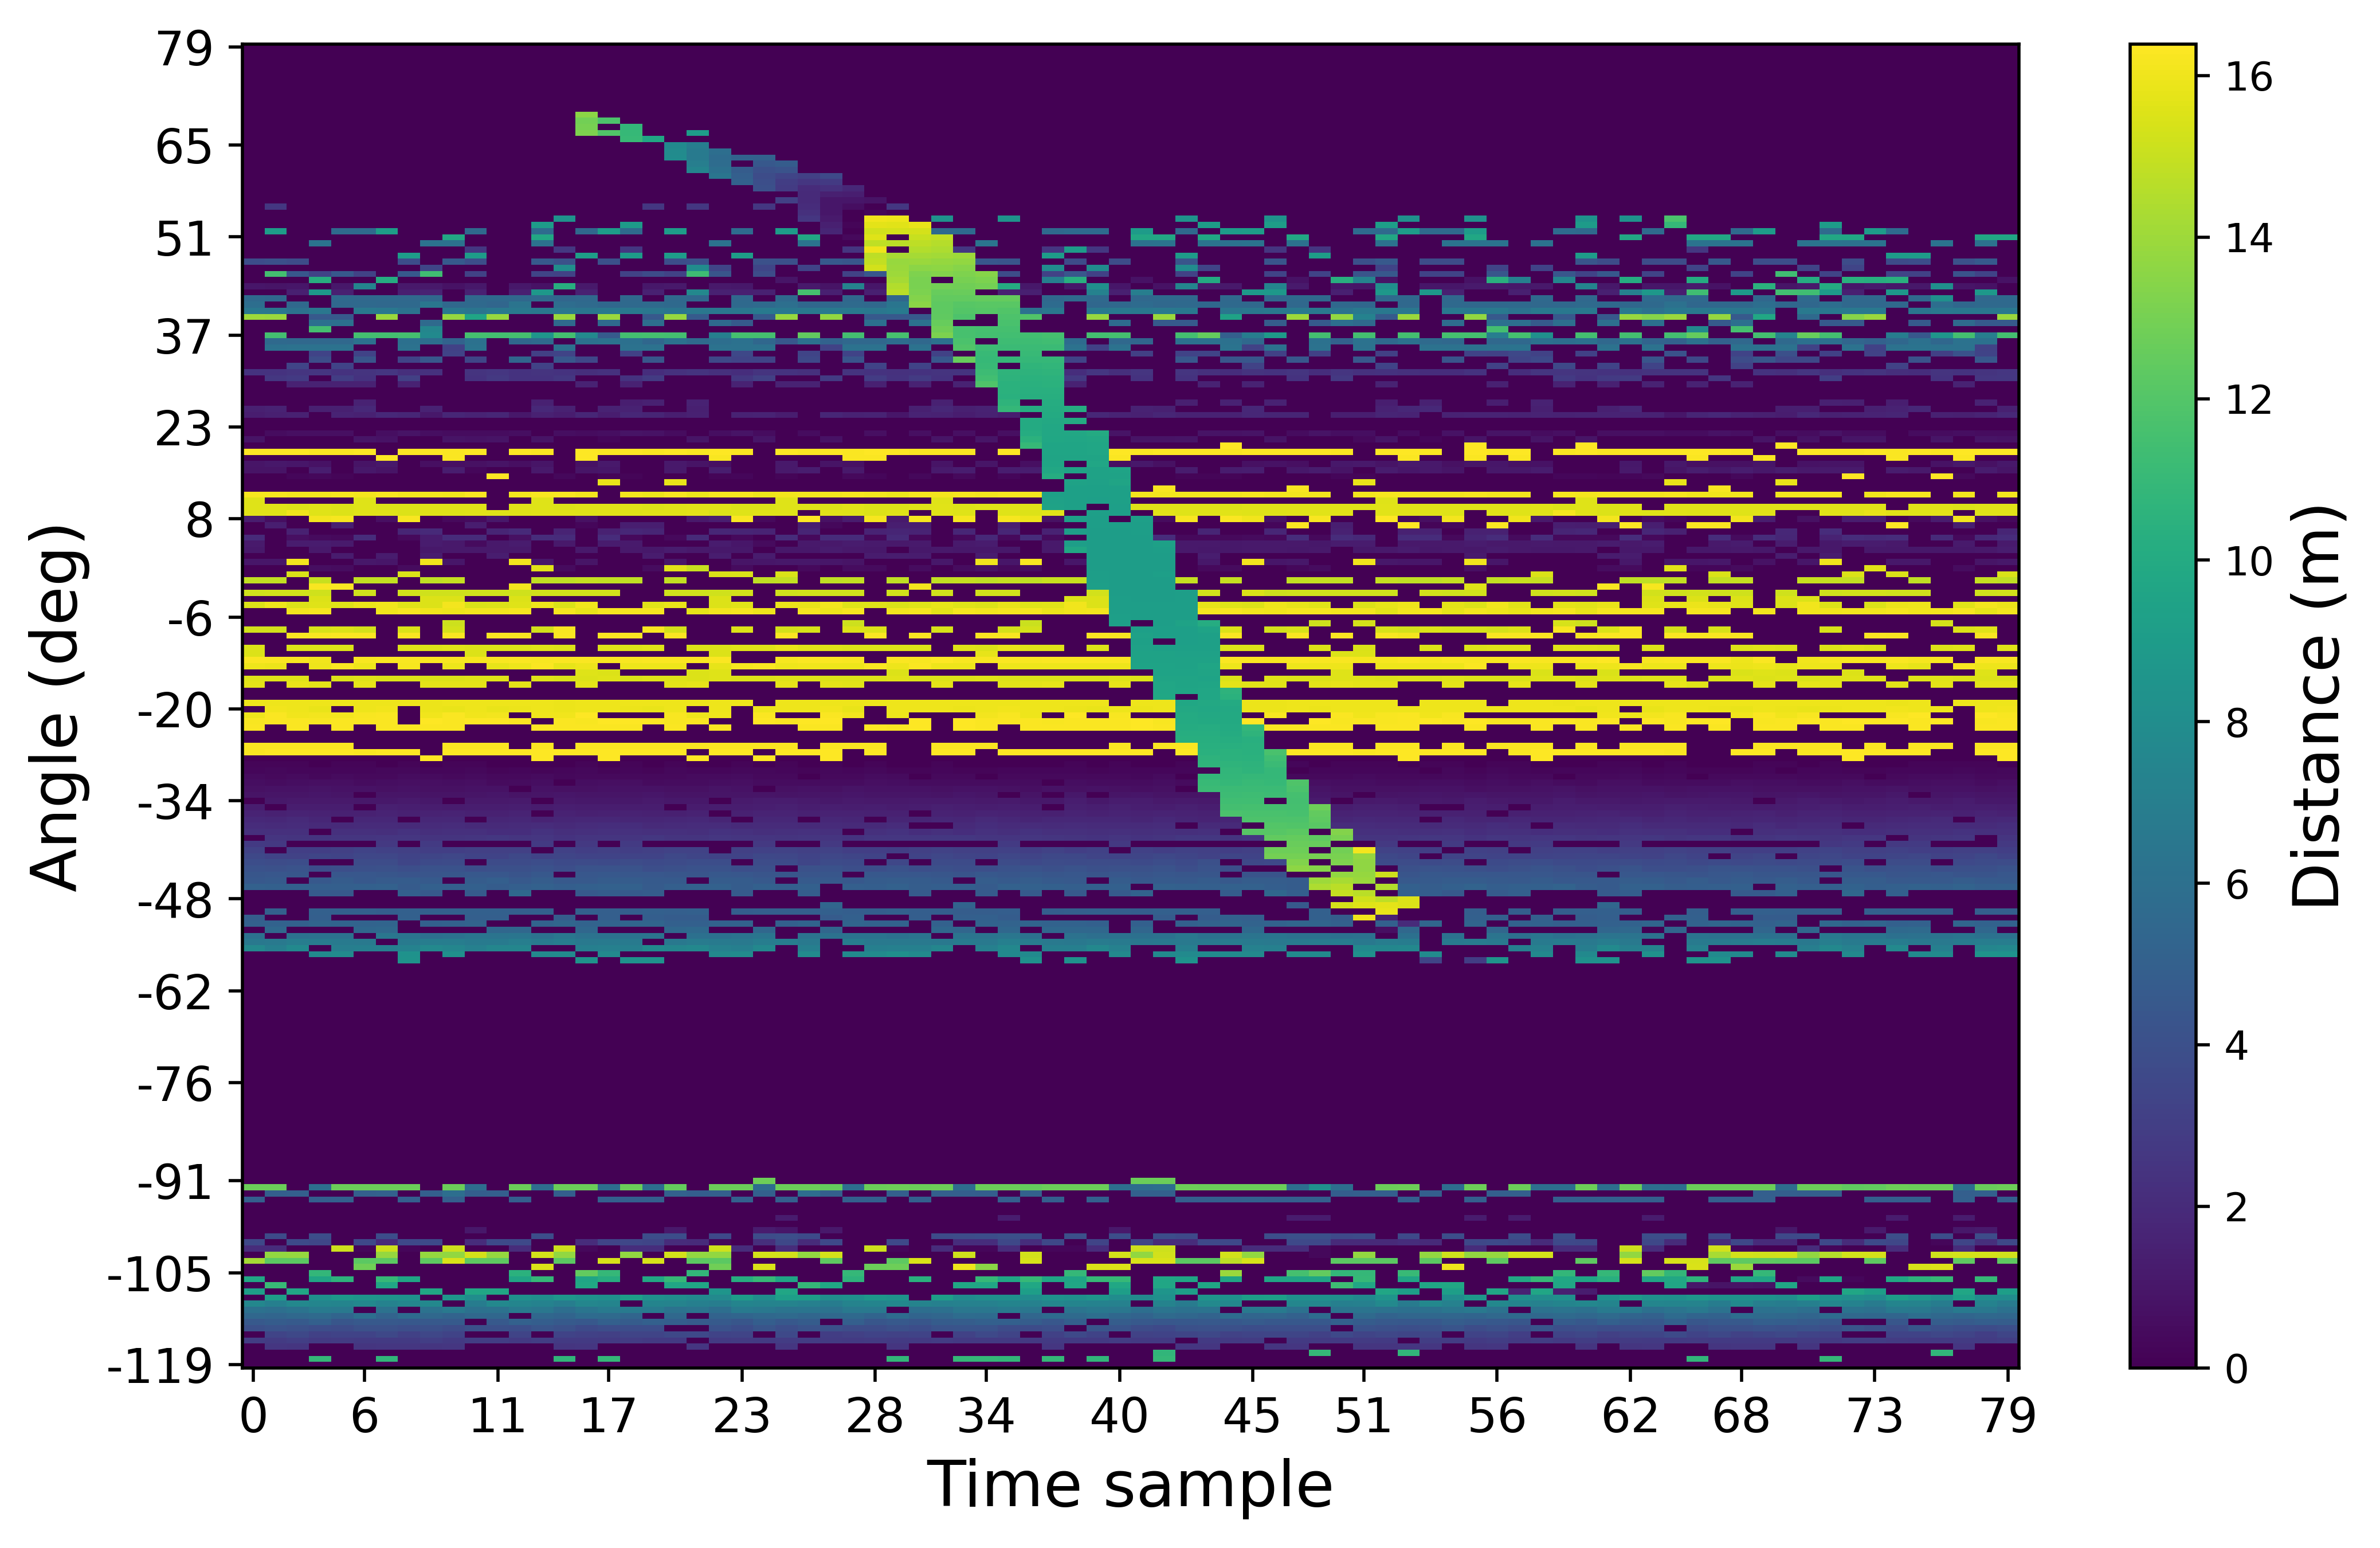

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Initialize an empty list to store the raw data from each time sample
all_data = []

# Load each .mat file, extract the data, and append to all_data
for i in range(1815, 1895):  # Adjust range as per your files
    mat_file_path = f'./scenario24/unit1/LiDAR_SCR_data/lidar_SCR_data_{i}.mat'
    mat_data = loadmat(mat_file_path)
    data = mat_data['data']
    all_data.append(data)

# Convert the list of arrays into a 3D numpy array
# The new shape will be (time instances, angles, distances)
raw_data = np.array(all_data)
# Flip the distance data in the raw_data array
raw_data_flipped = raw_data[:, ::-1, :]


# Extract distance data
distance_data = raw_data[:, :, 0]
distance_data = distance_data[::-1, :]

# Convert angle data from radians to degrees, adjusting for the full range from 0 to 180 degrees
angle_data_radians = raw_data[:, :, 1]
angle_data_degrees = np.rad2deg(angle_data_radians)

# Convert negative radians to the corresponding degree values greater than 90
# For positive radians, map directly to degree values less than 90
#angle_data_degrees = np.where(angle_data_degrees < 0, 180 + angle_data_degrees, angle_data_degrees)

# Plot the heatmap with the distance data
plt.figure(figsize=(10, 6), dpi=500)

# The X-axis will correspond to time (in samples) and the Y-axis will correspond to angles in degrees
heatmap = plt.imshow(distance_data.T, aspect='auto', cmap='viridis', origin='lower')

colorbar = plt.colorbar(heatmap)
colorbar.set_label('Distance (m)', fontsize=16)

# Set x-label and y-label with increased font size
plt.xlabel('Time sample', fontsize=16)
plt.ylabel('Angle (deg)', fontsize=16)

# Increase the number of y-ticks
num_y_ticks = 15  # Adjust as needed for y-axis
y_ticks_positions = np.linspace(0, distance_data.shape[1] - 1, num_y_ticks).astype(int)
y_ticks_labels = np.round(np.linspace(angle_data_degrees.min(), angle_data_degrees.max(), num_y_ticks)).astype(int)
plt.yticks(y_ticks_positions, labels=y_ticks_labels, fontsize=12)

# Increase the number of x-ticks
num_x_ticks = 15  # Adjust as needed for x-axis
x_ticks_positions = np.linspace(0, distance_data.shape[0] - 1, num_x_ticks).astype(int)
x_ticks_labels = np.round(np.linspace(0, distance_data.shape[0] - 1, num_x_ticks)).astype(int)
plt.xticks(x_ticks_positions, labels=x_ticks_labels, fontsize=12)

plt.show()

Index for angle closest to 0°: 129
Actual mapped angle: 0.00°

Distances at angle closest to 0° across all time instances:
[ 0.          0.         15.47755511  0.          0.          0.
  0.         15.47755511  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         15.47755511 15.47755511  0.
 15.47755511  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          9.17815631  9.11042084  9.11042084  9.24589178
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         15.47755511  0.
  0.          0.          0.          0.          0.          0.
 15.47755511  0.          0.          0.          0.          0.
 15.47755511  0.         15.47755511  0.          0.          0.
  0.         15.47755511

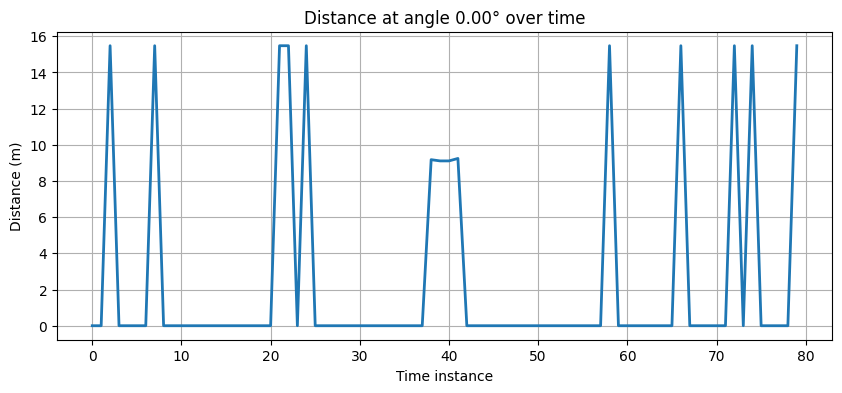

In [39]:
# Get the number of angle points in the distance matrix
num_angles = distance_data.shape[1]

# Create evenly spaced angles from -120 to 80
mapped_angles = np.linspace(-120, 80, num_angles)

# Find index closest to 0 degrees
zero_angle_idx = np.argmin(np.abs(mapped_angles))
print(f"Index for angle closest to 0°: {zero_angle_idx}")
print(f"Actual mapped angle: {mapped_angles[zero_angle_idx]:.2f}°")

# Get distances at this angle for all time instances
distances_at_zero = distance_data[:, zero_angle_idx]
print("\nDistances at angle closest to 0° across all time instances:")
print(distances_at_zero)

# Plot these distances
plt.figure(figsize=(10, 4))
plt.plot(distances_at_zero, linewidth=2)
plt.xlabel('Time instance')
plt.ylabel('Distance (m)')
plt.grid(True)
plt.title(f'Distance at angle {mapped_angles[zero_angle_idx]:.2f}° over time')
plt.show()

In [40]:
# Flattening the arrays and combine them into a single array for processing
distances_flattened = raw_data[:, :, 0].flatten()
time_instances = np.repeat(np.arange(raw_data.shape[0]), raw_data.shape[1])

max_avg_distance = -np.inf
max_time_range = (0, 0)

# Calculate the moving average over every 30 time instances
for start_time in range(0, 50):
    end_time = start_time + 30
    # Calculating the average for the current window of time instances
    current_window_mask = (time_instances >= start_time) & (time_instances < end_time)
    current_avg_distance = np.mean(distances_flattened[current_window_mask])
    
    # Checking if the current average is the maximum and update the tracking variables if so
    if current_avg_distance > max_avg_distance:
        max_avg_distance = current_avg_distance
        max_time_range = (start_time, end_time - 1)

print(f"Time instance of blockage: {max_time_range[0]}-{max_time_range[1]}")

Time instance of blockage: 27-56


In [41]:
# Get the number of angle points in the distance matrix
num_angles = distance_data.shape[1]

# Create evenly spaced angles from -120 to 80
mapped_angles = np.linspace(-120, 80, num_angles)

# Find index closest to 0 degrees
zero_angle_idx = np.argmin(np.abs(mapped_angles))
print(f"Index for angle closest to 0°: {zero_angle_idx}")
print(f"Actual mapped angle: {mapped_angles[zero_angle_idx]:.2f}°")

# Get distances at angle 0 during blockage period
blockage_period_distances = distances_at_zero[max_time_range[0]:max_time_range[1]+1]

# Find time instances where 0 < distance <= 15
valid_mask = (blockage_period_distances > 0) & (blockage_period_distances <= 15)
complete_blockage_times = np.where(valid_mask)[0] + max_time_range[0]

print(f"\nTime instances with complete blockage (0 < distance <= 15m):")
print(complete_blockage_times)
print("\nCorresponding distances (m):")
print(blockage_period_distances[valid_mask])

# Optional: Print side by side for better readability
print("\nTime instance | Distance (m)")
print("-" * 30)
for t, d in zip(complete_blockage_times, blockage_period_distances[valid_mask]):
    print(f"{t:12d} | {d:10.2f}")

Index for angle closest to 0°: 129
Actual mapped angle: 0.00°

Time instances with complete blockage (0 < distance <= 15m):
[38 39 40 41]

Corresponding distances (m):
[9.17815631 9.11042084 9.11042084 9.24589178]

Time instance | Distance (m)
------------------------------
          38 |       9.18
          39 |       9.11
          40 |       9.11
          41 |       9.25


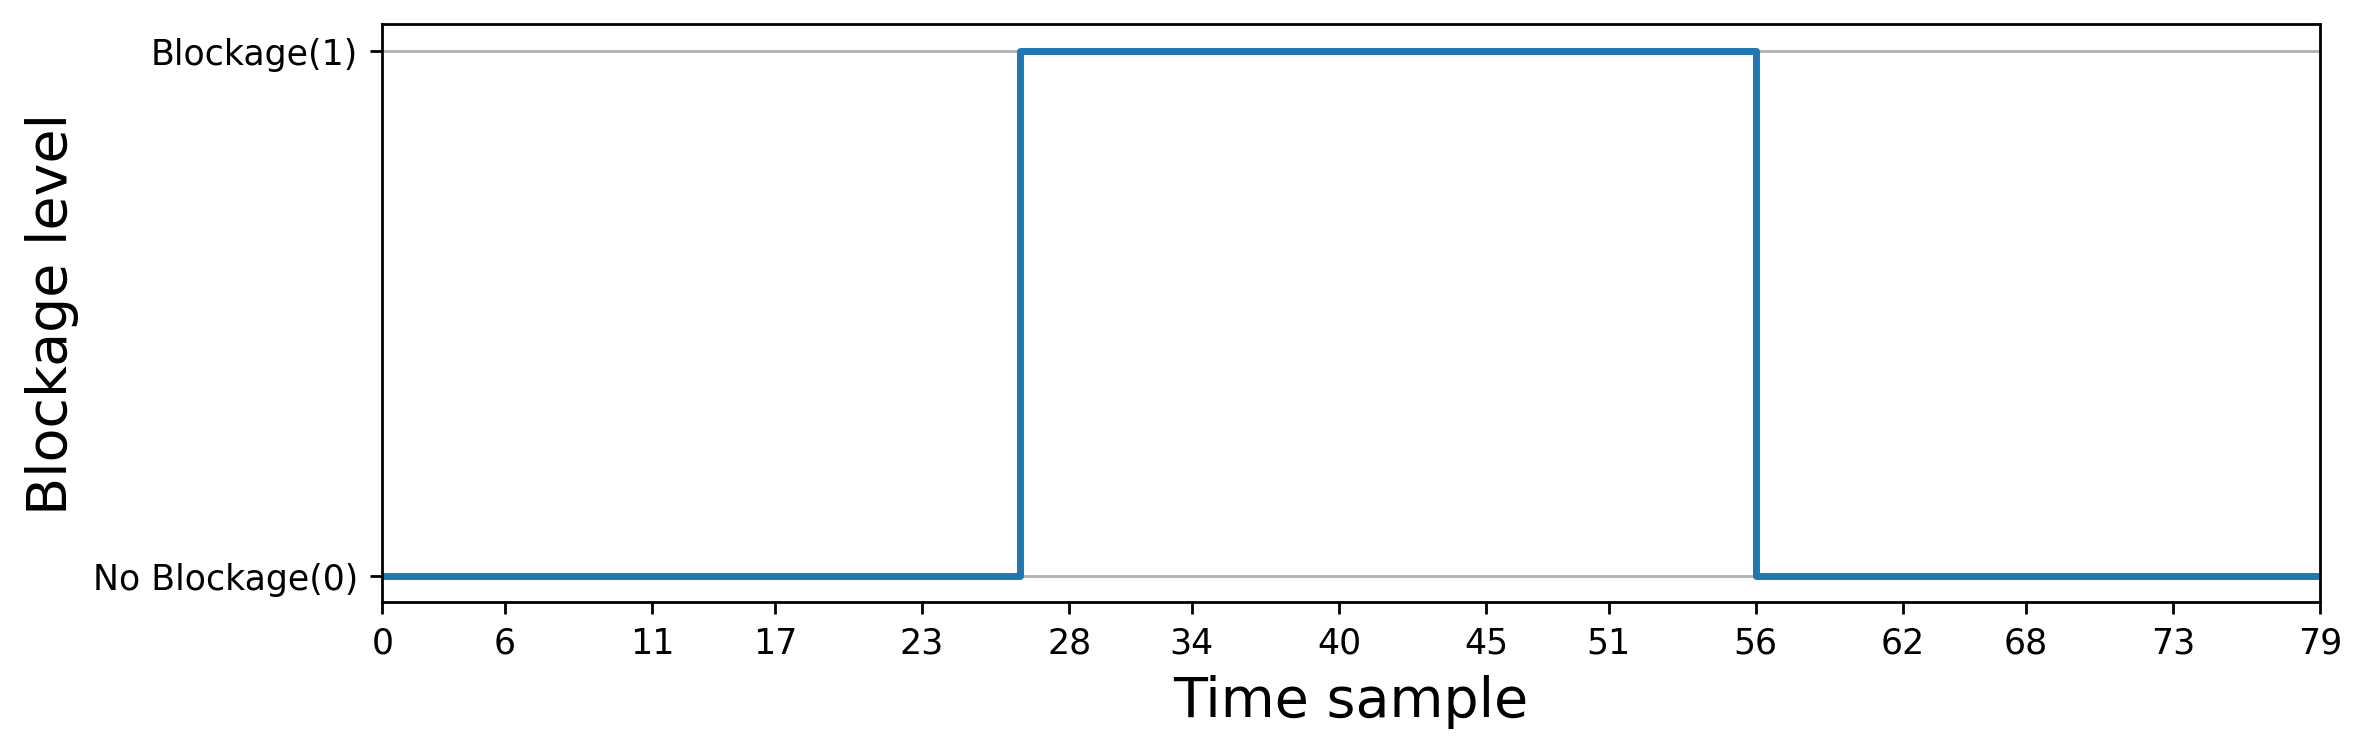

In [42]:
# Define the number of time samples
num_time_samples = distance_data.shape[0]

# Initialize the blockage array with zeros
blockage_labels = np.zeros(num_time_samples)

# Set blockage level to 1 in the range of max_time_range
blockage_labels[max_time_range[0]:max_time_range[1] + 1] = 1

# Plot the blockage label graph
plt.figure(figsize=(10, 3), dpi=250)
plt.plot(blockage_labels, drawstyle='steps-pre', linewidth=2)

# Set the labels and title
plt.xlabel('Time sample', fontsize=16)
plt.ylabel('Blockage level', fontsize=16)

# Set the x-ticks and y-ticks
plt.xticks(x_ticks_positions, labels=x_ticks_labels)
plt.yticks([0, 1], labels=['No Blockage(0)', 'Blockage(1)'])

# Customize the grid to only show horizontal gridlines
plt.grid(axis='y', which='both')

plt.xlim(0, num_time_samples - 1)  # Use the same x-axis limits as the previous plot

plt.show()

In [43]:
import numpy as np

def find_blockage_angle_range(distance_data, angle_data_degrees, window_size):
    # Flattening arrays for angle and distance data
    angles_flattened = angle_data_degrees.flatten()
    distances_flattened = distance_data.flatten()

    # Rounding the angle values to the nearest integer within the range of -120 to 80 degrees
    rounded_angles = np.round(angles_flattened).astype(int)
    rounded_angles = np.clip(rounded_angles, -120, 80)

    max_sum_distance = -np.inf
    max_angle_range = (-120, 80)  # Complete range of LiDAR

    for start_angle in range(-120, 81 - window_size):
        end_angle = start_angle + window_size
        angle_window_mask = (rounded_angles >= start_angle) & (rounded_angles < end_angle)

        if np.any(angle_window_mask):  
            window_sum_distance = np.sum(distances_flattened[angle_window_mask])
            
            # Updating highest sum of distances and corresponding angle range if needed
            if window_sum_distance > max_sum_distance:
                max_sum_distance = window_sum_distance
                max_angle_range = (start_angle, end_angle)

    return max_angle_range

window_size = 105  # Set the desired window size

angle_range_overall = find_blockage_angle_range(distance_data, angle_data_degrees, window_size)
print(f"Angle range of blockage: {angle_range_overall[0]} to {angle_range_overall[1]} degrees")

Angle range of blockage: -54 to 51 degrees


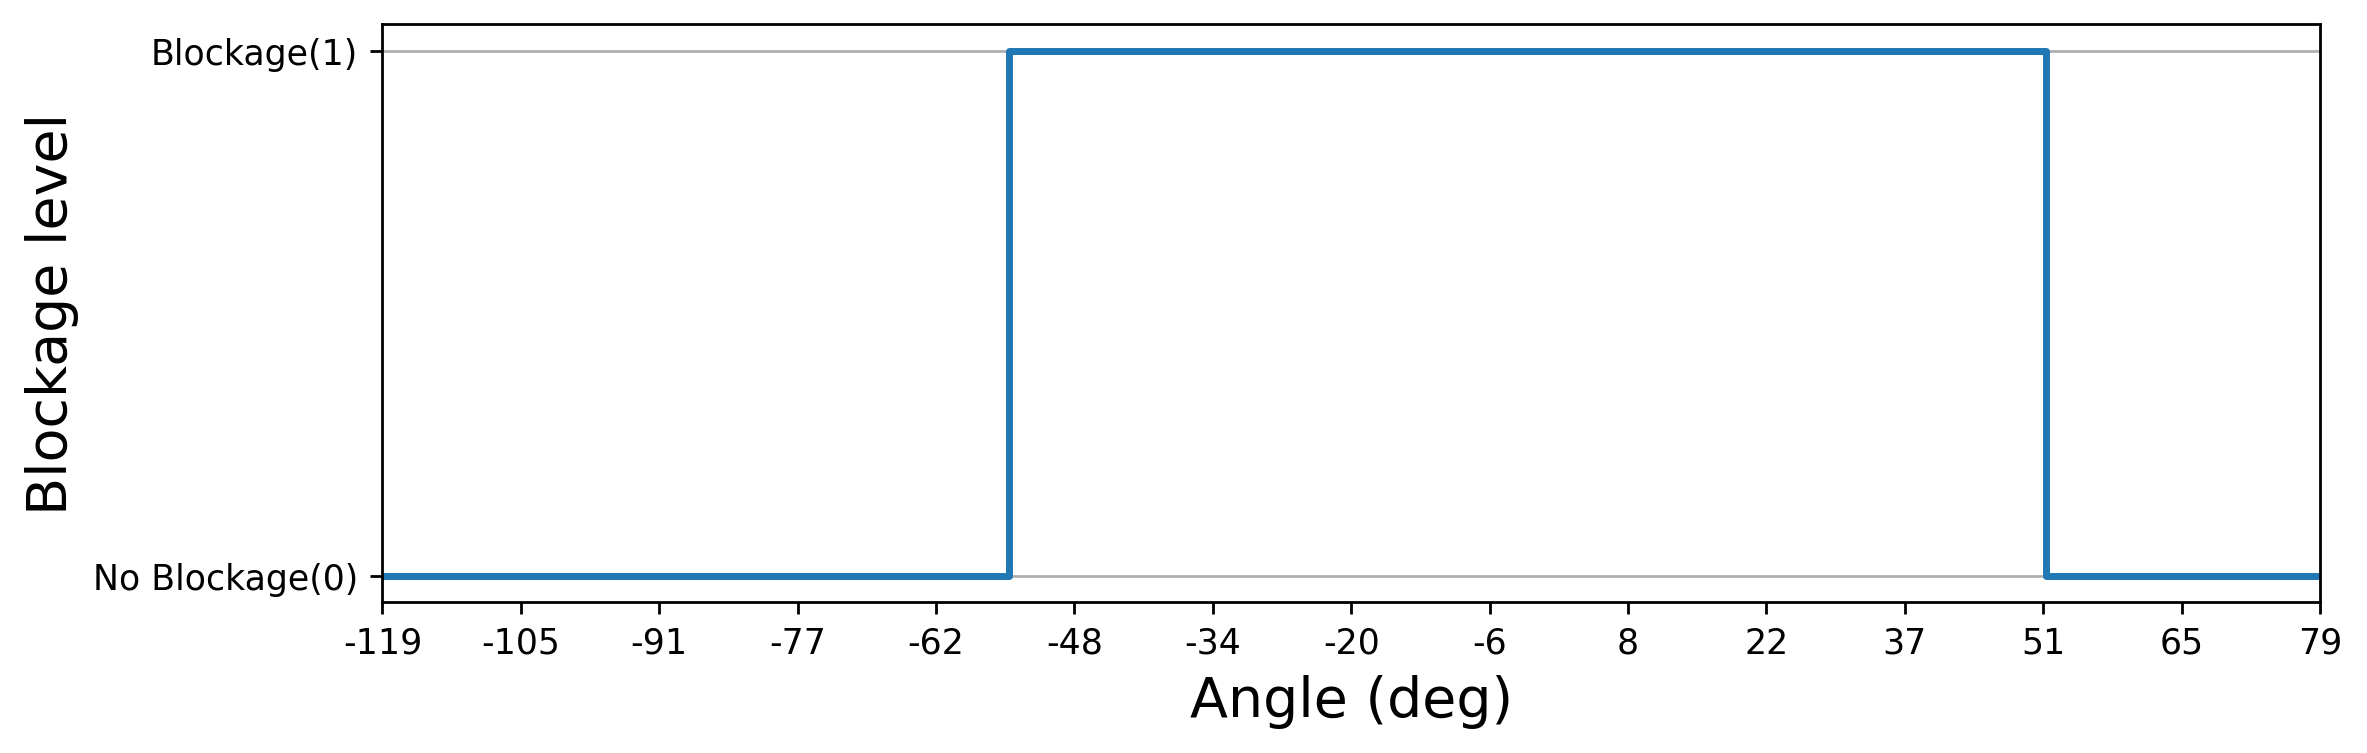

In [44]:
# Define the angle data range and blockage range
angle_data_deg = np.arange(np.round(angle_data_degrees.min()), np.round(angle_data_degrees.max()+1))  # Angle range from -119 to 79
blockage_range = (angle_range_overall[0], angle_range_overall[1])  # Blockage range from -54 to 51

# Initialize the blockage array with zeros
blockage_labels = np.zeros_like(angle_data_deg)

# Set blockage level to 1 in the blockage range
blockage_labels[(angle_data_deg >= blockage_range[0]) & (angle_data_deg <= blockage_range[1])] = 1

# Plot the blockage label graph
plt.figure(figsize=(10, 3), dpi=250)
plt.plot(angle_data_deg, blockage_labels, drawstyle='steps-pre', linewidth=2)

# Set the labels and title
plt.xlabel('Angle (deg)', fontsize=16)
plt.ylabel('Blockage level', fontsize=16)

# Set the y-ticks
plt.yticks([0, 1], labels=['No Blockage(0)', 'Blockage(1)'])

# Customize the grid to only show horizontal gridlines
plt.grid(axis='y', which='both')

# Set the x-axis limits and ticks
num_x_ticks = 15
x_ticks_positions = np.linspace(np.round(angle_data_degrees.min()), np.round(angle_data_degrees.max()), num_x_ticks)
x_ticks_labels = np.round(x_ticks_positions).astype(int)
plt.xticks(x_ticks_positions, labels=x_ticks_labels)

plt.xlim(np.round(angle_data_degrees.min()), np.round(angle_data_degrees.max()))
plt.show()


Time instance of blockage: 27-56


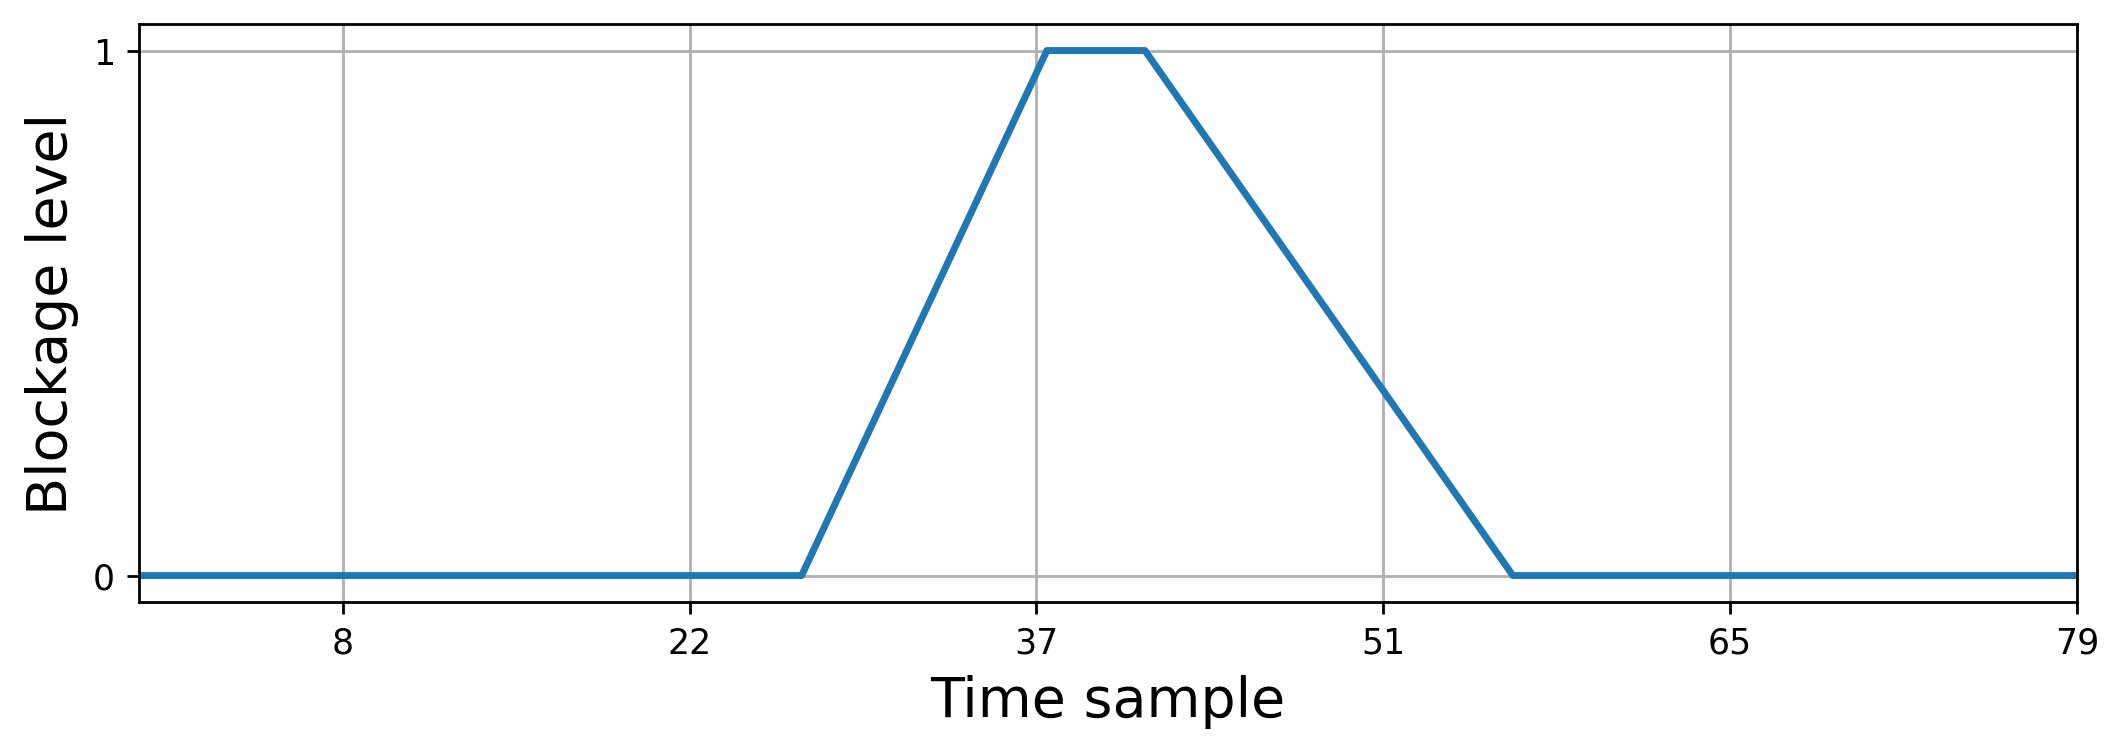

In [45]:
# Get distances at angle 0 using mapped angles
num_angles = distance_data.shape[1]
mapped_angles = np.linspace(-120, 80, num_angles)
zero_angle_idx = np.argmin(np.abs(mapped_angles))
distances_at_zero = distance_data[:, zero_angle_idx]

# Get blockage time range
distances_flattened = raw_data[:, :, 0].flatten()
time_instances = np.repeat(np.arange(raw_data.shape[0]), raw_data.shape[1])
max_avg_distance = -np.inf
max_time_range = (0, 0)

# Calculate the moving average over every 30 time instances
for start_time in range(0, 50):
    end_time = start_time + 30
    current_window_mask = (time_instances >= start_time) & (time_instances < end_time)
    current_avg_distance = np.mean(distances_flattened[current_window_mask])
    if current_avg_distance > max_avg_distance:
        max_avg_distance = current_avg_distance
        max_time_range = (start_time, end_time - 1)
print(f"Time instance of blockage: {max_time_range[0]}-{max_time_range[1]}")

# Find complete blockage instances (0 < distance <= 15) within blockage time range
blockage_period_distances = distances_at_zero[max_time_range[0]:max_time_range[1]+1]
valid_mask = (blockage_period_distances > 0) & (blockage_period_distances <= 15)
complete_blockage_times = np.where(valid_mask)[0] + max_time_range[0]

# Define the number of time samples
num_time_samples = distance_data.shape[0]

# Initialize the blockage array with zeros
blockage_levels = np.zeros(num_time_samples)

if len(complete_blockage_times) > 0:
    # Start of full blockage period
    first_full_block = complete_blockage_times[0]
    # End of full blockage period
    last_full_block = complete_blockage_times[-1]
    
    # Linear interpolation from start to first full blockage
    blockage_levels[max_time_range[0]:first_full_block] = np.linspace(0, 1, first_full_block - max_time_range[0])
    
    # Full blockage period
    blockage_levels[first_full_block:last_full_block+1] = 1
    
    # Linear interpolation from last full blockage to end
    blockage_levels[last_full_block:max_time_range[1]+1] = np.linspace(1, 0, max_time_range[1] - last_full_block + 1)

# Plot the blockage label graph
plt.figure(figsize=(10, 3), dpi=250)
plt.plot(blockage_levels, linewidth=2)
plt.xlabel('Time sample', fontsize=16)
plt.ylabel('Blockage level', fontsize=16)
plt.xticks(x_ticks_positions, labels=x_ticks_labels)
plt.yticks([0, 1])
plt.grid(True)
plt.xlim(0, num_time_samples - 1)
plt.show()

ValueError: The number of FixedLocator locations (15402), usually from a call to set_ticks, does not match the number of labels (80).

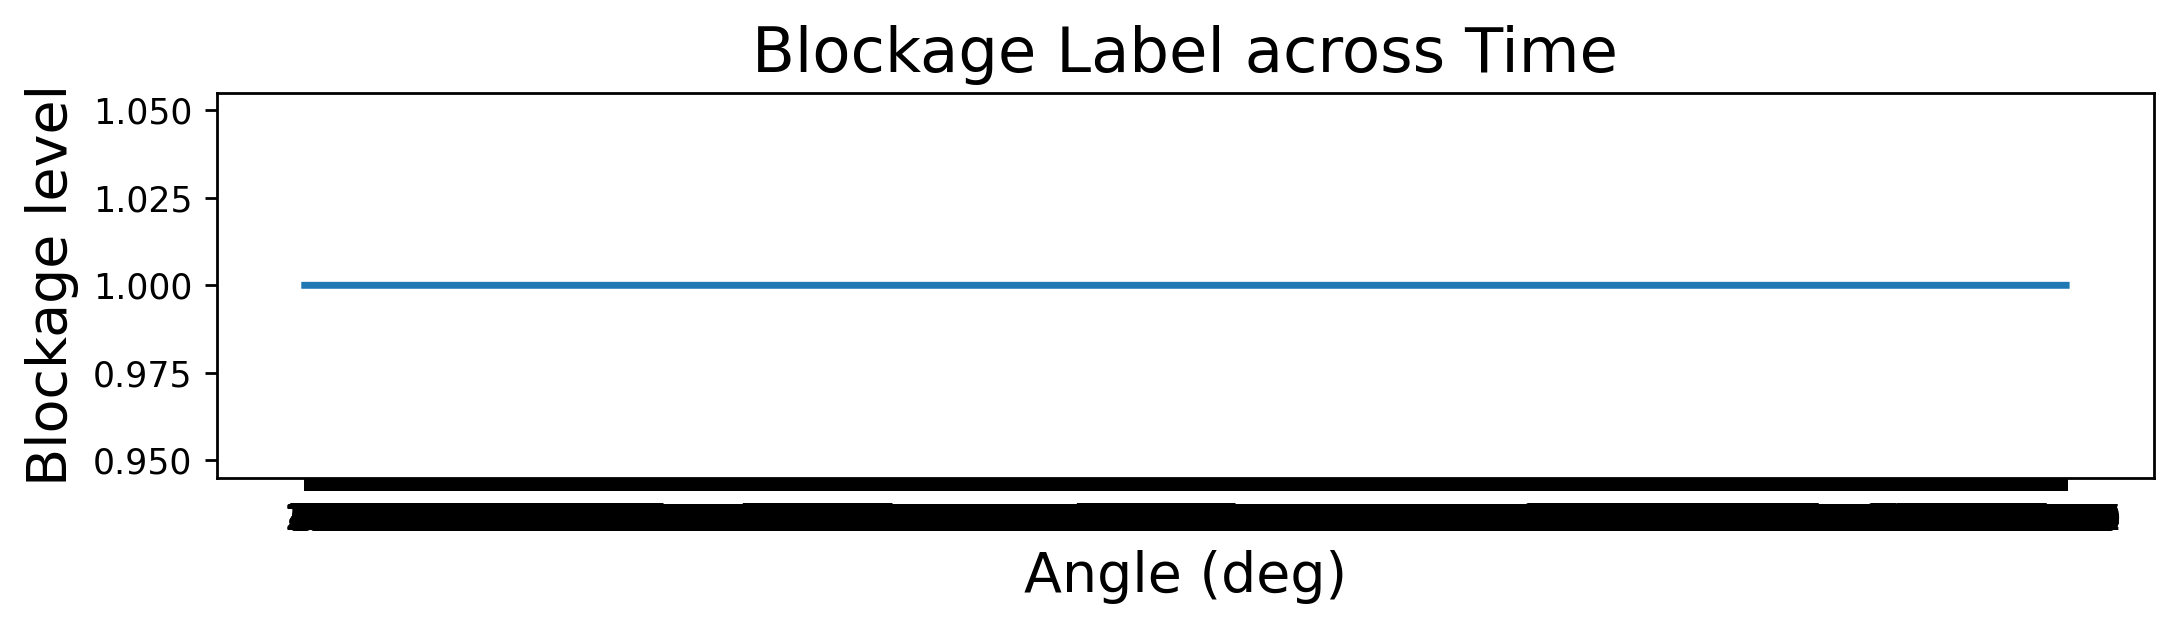

In [46]:
# Assuming the blockage angle range function is defined as find_blockage_angle_range

# Find the angle range of blockage
window_size = 105  # Set the desired window size
angle_range_overall = find_blockage_angle_range(distance_data, angle_data_degrees, window_size)

# Extract the relevant angle indices for the blockage range
angle_indices = np.where((angle_data_degrees >= angle_range_overall[0]) & (angle_data_degrees < angle_range_overall[1]))[1]

# Initialize the blockage array with zeros
blockage_level = np.zeros_like(angle_indices)

# Set blockage level to 1 where blockage occurs
blockage_level[:] = 1

# Plot the blockage level across time
plt.figure(figsize=(10, 2), dpi=250)
plt.plot(blockage_level, drawstyle='steps-pre', linewidth=2, label='Blockage Level')

# Set the labels and title
plt.xlabel('Angle (deg)', fontsize=16)
plt.ylabel('Blockage level', fontsize=16)
plt.title('Blockage Label across Time', fontsize=18)

# Set the x-ticks and y-ticks
plt.xticks(np.arange(len(angle_indices)), labels=np.round(angle_data_degrees[:, angle_indices[0]], decimals=1))
plt.yticks([0, 1])

# Add a legend
plt.legend(['No Blockage', 'Blockage'], loc='upper right')

plt.show()


In [47]:
from collections import Counter

# Flatten the arrays and combine them into a single array for processing
distances_flattened = raw_data[:, :, 0].flatten()
angles_flattened = angle_data_degrees.flatten()
time_instances = np.repeat(np.arange(raw_data.shape[0]), raw_data.shape[1])

angle_range_for_mode = find_blockage_angle_range(distance_data, angle_data_degrees, 45)

# Define the angle and time instance range
angle_range = (angle_range_for_mode[0], angle_range_for_mode[1])
time_instance_range = (max_time_range[0], max_time_range[1])

# Filter for the specified time instance and angle ranges
filtered_data_mask = ((time_instances >= time_instance_range[0]) & (time_instances <= time_instance_range[1]) &
                      (angles_flattened >= angle_range[0]) & (angles_flattened <= angle_range[1]))

# Apply the filter mask to the distance data
filtered_distances = distances_flattened[filtered_data_mask]

# Count the occurrences of each distance value
distance_counts = Counter(filtered_distances)

# Find the values with the four highest counts (the first four modes)
most_common_distances = distance_counts.most_common(20)

# Print the first four modes and their counts
print("Modes of the distance data:")
for i, (value, count) in enumerate(most_common_distances, start=1):
    print(f"  Mode {i}: Value = {value}, Count = {count}")

Modes of the distance data:
  Mode 1: Value = 0.0, Count = 3443
  Mode 2: Value = 16.324248496993985, Count = 40
  Mode 3: Value = 15.951703406813625, Count = 35
  Mode 4: Value = 16.358116232464926, Count = 31
  Mode 5: Value = 15.985571142284567, Count = 30
  Mode 6: Value = 16.290380761523043, Count = 29
  Mode 7: Value = 15.545290581162323, Count = 28
  Mode 8: Value = 15.579158316633265, Count = 25
  Mode 9: Value = 15.613026052104207, Count = 23
  Mode 10: Value = 9.144288577154308, Count = 19
  Mode 11: Value = 15.51142284569138, Count = 18
  Mode 12: Value = 9.110420841683366, Count = 17
  Mode 13: Value = 9.17815631262525, Count = 16
  Mode 14: Value = 16.121042084168334, Count = 14
  Mode 15: Value = 16.087174348697392, Count = 14
  Mode 16: Value = 16.188777555110217, Count = 14
  Mode 17: Value = 16.2565130260521, Count = 14
  Mode 18: Value = 1.0837675350701401, Count = 14
  Mode 19: Value = 16.22264529058116, Count = 12
  Mode 20: Value = 15.646893787575149, Count = 12


In [48]:
median_obstruction_dist = None

# Iterate through the most common distances
for distance, _ in most_common_distances:
    # Check if the distance is less than 14
    if (distance < 15) & (distance > 2):
        # Store the first such distance and exit the loop
        median_obstruction_dist = distance
        break

# Check if a suitable distance was found
if median_obstruction_dist is not None:
    print(f"The first distance value less than 14: {median_obstruction_dist}")
else:
    print("No distance value less than 14 found in the most common distances.")

The first distance value less than 14: 9.144288577154308


In [49]:
# Flatten the arrays for processing
distances_flattened = raw_data[:, :, 0].flatten()
angles_flattened = angle_data_degrees.flatten()
time_instances = np.repeat(np.arange(raw_data.shape[0]), raw_data.shape[1])

# Define the time instance range, distance range, and angle range
time_instance_range = (max_time_range[0], max_time_range[1])
distance_range = (median_obstruction_dist - 0.3, median_obstruction_dist + 0.3)
angle_range = (-51, 51)

# Filter for the specified time instances, distance range, and angle range
filtered_data_mask = ((time_instances >= time_instance_range[0]) & 
                      (time_instances <= time_instance_range[1]) &
                      (distances_flattened >= distance_range[0]) & 
                      (distances_flattened <= distance_range[1]) &
                      (angles_flattened >= angle_range[0]) & 
                      (angles_flattened <= angle_range[1]))

filtered_angles = angles_flattened[filtered_data_mask]

# Get unique angle values within the specified range
unique_angles = np.unique(filtered_angles)

# Print the list of discrete unique angle values
print("Discrete unique angle values between time instances", time_instance_range[0], "to", time_instance_range[1], "within angle range ", angle_range[0], "to ", angle_range[1], " degrees:")
print(unique_angles.shape)
print(unique_angles)


Discrete unique angle values between time instances 27 to 56 within angle range  -51 to  51  degrees:
(106,)
[-7.859375 -7.578125 -7.140625 -7.015625 -6.75     -6.703125 -5.921875
 -5.671875 -5.625    -5.609375 -4.8125   -4.75     -4.390625 -3.65625
 -3.5625   -3.296875 -2.828125 -2.453125 -2.375    -2.125    -1.71875
 -1.625    -0.875    -0.53125  -0.421875 -0.171875 -0.09375   0.296875
  0.71875   1.0625    1.140625  1.421875  1.765625  1.8125    1.875
  2.25      2.59375   2.6875    3.09375   3.390625  3.6875    4.03125
  4.1875    4.203125  4.5625    4.640625  5.03125   5.125     5.5625
  6.109375  6.140625  6.15625   6.9375    6.984375  7.078125  7.4375
  7.6875    8.078125  8.140625  8.359375  8.515625  8.90625   9.0625
  9.390625  9.625    10.09375  10.3125   10.453125 10.46875  10.9375
 11.015625 11.328125 11.59375  11.859375 12.03125  12.421875 12.890625
 12.953125 13.296875 13.8125   13.96875  13.984375 14.828125 14.90625
 15.265625 15.921875 16.203125 16.765625 16.78125  17.

In [ ]:
#time_instance_range = (1, 79)
#distance_range = (median_obstruction_dist - 0.3, median_obstruction_dist + 0.3)

In [50]:
# Create a combined array of time instances, angles, and distances
time_instances = np.repeat(np.arange(raw_data.shape[0]), raw_data.shape[1])
combined_data = np.vstack((time_instances, angle_data_degrees.flatten(), raw_data[:, :, 0].flatten())).T

# Define the time instance range, distance range, and angle range
time_instance_range = (max_time_range[0], max_time_range[1])
distance_range = (0, 14)
angle_range = angle_range_overall

# Filter for the specified time instances, distance range, and angle range
filtered_data = combined_data[(combined_data[:, 0] >= time_instance_range[0]) & 
                              (combined_data[:, 0] <= time_instance_range[1]) &
                              (combined_data[:, 2] >= distance_range[0]) & 
                              (combined_data[:, 2] <= distance_range[1]) &
                              (combined_data[:, 1] >= angle_range[0]) & 
                              (combined_data[:, 1] <= angle_range[1])]

# Get unique angles from the filtered data
unique_angles = np.unique(filtered_data[:, 1])

# For each unique angle, find the corresponding distance values
angle_distance_mapping = {}
for angle in unique_angles:
    corresponding_distances = filtered_data[filtered_data[:, 1] == angle, 2]
    angle_distance_mapping[angle] = corresponding_distances

# Print the angle-distance mappings
print("Angle-Distance Mappings:")
for angle, distances in angle_distance_mapping.items():
    print(f"Angle {angle} degrees has distances: {distances}")

Angle-Distance Mappings:
Angle -53.89062499999996 degrees has distances: [7.65410822 7.62024048]
Angle -53.85937500000001 degrees has distances: [7.58637275]
Angle -53.81249999999997 degrees has distances: [7.62024048]
Angle -53.76562500000004 degrees has distances: [7.55250501]
Angle -53.59374999999999 degrees has distances: [7.65410822]
Angle -53.34374999999996 degrees has distances: [7.14609218]
Angle -53.31250000000001 degrees has distances: [7.14609218]
Angle -53.28125000000005 degrees has distances: [7.17995992]
Angle -53.26562499999997 degrees has distances: [7.21382766]
Angle -53.24999999999999 degrees has distances: [7.11222445]
Angle -53.187499999999986 degrees has distances: [7.11222445]
Angle -53.17187500000001 degrees has distances: [7.07835671 7.04448898]
Angle -53.156250000000036 degrees has distances: [7.04448898]
Angle -53.14062499999996 degrees has distances: [7.07835671]
Angle -53.109375 degrees has distances: [7.04448898]
Angle -53.031250000000014 degrees has distan

In [51]:
# Initialize a list to store the angle and averaged distance
angle_distance_avg = []

# Iterate through the angle-distance mapping
for angle, distances in angle_distance_mapping.items():
    # Calculate the average distance for the current angle
    avg_distance = np.mean(distances)
    # Append the angle and averaged distance to the list
    angle_distance_avg.append([angle, avg_distance])

# Convert the list to a 2D numpy array
angle_distance_array = np.array(angle_distance_avg)

# Print the resulting array
print("Angle-Distance Array (with averaged distances):")
print(angle_distance_array.shape)
print(angle_distance_array)


Angle-Distance Array (with averaged distances):
(1837, 2)
[[-53.890625     7.63717435]
 [-53.859375     7.58637275]
 [-53.8125       7.62024048]
 ...
 [ 50.84375      0.        ]
 [ 50.90625     12.63266533]
 [ 50.953125     0.        ]]


In [52]:
angle_distance_array_copy = np.copy(angle_distance_array)
angle_distance_array_copy[:, 0] = np.deg2rad(angle_distance_array_copy[:, 0])
distance_cos_angle = angle_distance_array_copy[:, 1] * np.cos(angle_distance_array_copy[:, 0])
cos_range = (median_obstruction_dist - 1, median_obstruction_dist + 1)
filtered_angle_distance = angle_distance_array_copy[(distance_cos_angle >= cos_range[0]) & 
                                                    (distance_cos_angle <= cos_range[1])]
filtered_angle_distance[:, 0] = np.rad2deg(filtered_angle_distance[:, 0])
reversed_filtered_angle_distance = filtered_angle_distance[::-1]
print("Filtered Angle-Distance Array:")
print(reversed_filtered_angle_distance.shape)
print(reversed_filtered_angle_distance)

Filtered Angle-Distance Array:
(227, 2)
[[ 49.328125    13.51322645]
 [ 47.09375     13.90270541]
 [ 47.0625      13.88577154]
 [ 47.          13.98737475]
 [ 46.984375    13.95350701]
 [ 46.953125    13.7503006 ]
 [ 46.9375      13.7503006 ]
 [ 45.21875     11.58276553]
 [ 45.078125    11.650501  ]
 [ 44.53125     11.51503006]
 [ 44.484375    11.91297595]
 [ 44.4375      11.51503006]
 [ 44.421875    11.44729459]
 [ 44.34375     11.41342685]
 [ 44.296875    11.48116232]
 [ 44.1875      11.5488978 ]
 [ 44.140625    11.58276553]
 [ 44.125       11.61663327]
 [ 44.078125    11.58276553]
 [ 44.015625    12.49719439]
 [ 43.96875     12.46332665]
 [ 43.828125    11.61663327]
 [ 43.34375     11.31182365]
 [ 43.25        11.27795591]
 [ 43.125       11.75210421]
 [ 42.546875    11.21022044]
 [ 42.515625    11.17635271]
 [ 42.421875    11.17635271]
 [ 42.296875    11.92144289]
 [ 42.          11.14248497]
 [ 41.          11.04088176]
 [ 40.546875    10.90541082]
 [ 40.46875     10.90541082]
 [ 

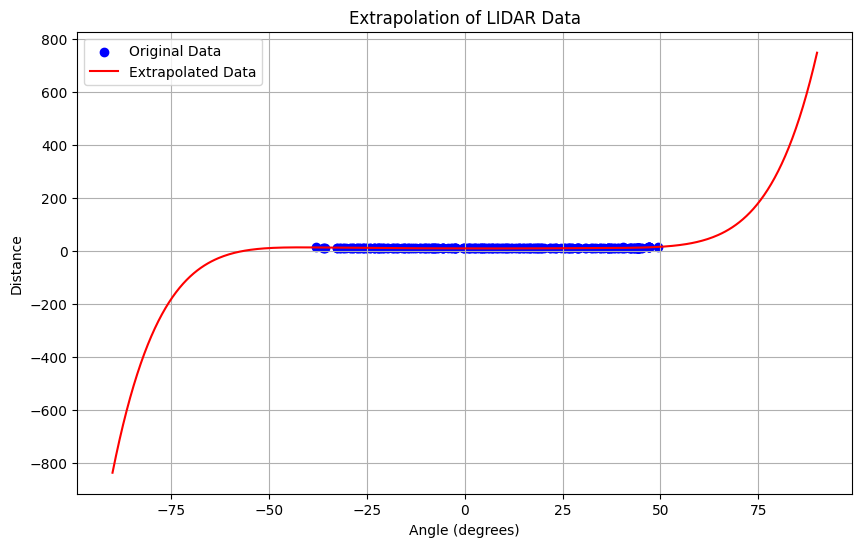

[[-9.00000000e+01 -8.36412803e+02]
 [-8.95488722e+01 -8.03666781e+02]
 [-8.90977444e+01 -7.71980327e+02]
 [-8.86466165e+01 -7.41325377e+02]
 [-8.81954887e+01 -7.11674454e+02]
 [-8.77443609e+01 -6.83000654e+02]
 [-8.72932331e+01 -6.55277646e+02]
 [-8.68421053e+01 -6.28479653e+02]
 [-8.63909774e+01 -6.02581454e+02]
 [-8.59398496e+01 -5.77558365e+02]
 [-8.54887218e+01 -5.53386237e+02]
 [-8.50375940e+01 -5.30041446e+02]
 [-8.45864662e+01 -5.07500884e+02]
 [-8.41353383e+01 -4.85741950e+02]
 [-8.36842105e+01 -4.64742542e+02]
 [-8.32330827e+01 -4.44481052e+02]
 [-8.27819549e+01 -4.24936354e+02]
 [-8.23308271e+01 -4.06087796e+02]
 [-8.18796992e+01 -3.87915195e+02]
 [-8.14285714e+01 -3.70398827e+02]
 [-8.09774436e+01 -3.53519421e+02]
 [-8.05263158e+01 -3.37258150e+02]
 [-8.00751880e+01 -3.21596621e+02]
 [-7.96240602e+01 -3.06516875e+02]
 [-7.91729323e+01 -2.92001371e+02]
 [-7.87218045e+01 -2.78032984e+02]
 [-7.82706767e+01 -2.64594997e+02]
 [-7.78195489e+01 -2.51671092e+02]
 [-7.73684211e+01 -2

In [53]:
import numpy as np
from numpy.polynomial.polynomial import Polynomial
import matplotlib.pyplot as plt

# Assuming reversed_filtered_angle_distance contains your original LIDAR data
sample_data = reversed_filtered_angle_distance

# Extracting angles and distances
angles = sample_data[:, 0]
distances = sample_data[:, 1]

# Fit a polynomial model to the data
degree = 7  # Degree of the polynomial to fit
model = Polynomial.fit(angles, distances, degree)

# Create a range of angles from -90 to 90 for extrapolation
extrapolated_angles = np.linspace(-90, 90, 400)

# Use the model to predict distances for these angles
extrapolated_distances = model(extrapolated_angles)

# Combine original and extrapolated data
combined_data = np.vstack((sample_data, np.column_stack((extrapolated_angles, extrapolated_distances))))

# Filter out the extrapolated data that falls within the original data range
mask = (extrapolated_angles < -43) | (extrapolated_angles > 51)
filtered_extrapolated_data = np.column_stack((extrapolated_angles[mask], extrapolated_distances[mask]))

# Combine the original data with the filtered extrapolated data
combined_data = np.vstack((sample_data, filtered_extrapolated_data))

# Sort the combined data by angle
sorted_combined_data = combined_data[combined_data[:, 0].argsort()]

# Plotting the original and extrapolated data
plt.figure(figsize=(10, 6))
plt.scatter(angles, distances, color='blue', label='Original Data')
plt.plot(extrapolated_angles, extrapolated_distances, color='red', label='Extrapolated Data')
plt.xlabel('Angle (degrees)')
plt.ylabel('Distance')
plt.title('Extrapolation of LIDAR Data')
plt.legend()
plt.grid(True)
plt.show()

# Sorted combined data is now available in 'sorted_combined_data'
print(sorted_combined_data)

# Combining data

In [54]:
import numpy as np

# Given raw_data with shape (50, 216, 2), where [:, :, 0] is distance and [:, :, 1] is angle in radians

# Convert angle data from radians to degrees, adjusting for the full range from 0 to 180 degrees
angle_data_degrees = np.rad2deg(raw_data[:, :, 1])
#angle_data_degrees = np.where(angle_data_degrees < 0, 180 + angle_data_degrees, angle_data_degrees)

# Initialize a list to hold the combined data
combined_data = []

# Loop through each time instance
for time_idx in range(raw_data.shape[0]):
    # For each time instance, stack the time index, angle in degrees, and distance horizontally
    time_data = np.hstack((np.full((raw_data.shape[1], 1), time_idx),
                           angle_data_degrees[time_idx, :].reshape(-1, 1),
                           raw_data[time_idx, :, 0].reshape(-1, 1)))
    # Append to the combined_data list
    combined_data.append(time_data)

# Concatenate all the time instance data vertically to create a single 2D array
combined_data_array = np.vstack(combined_data)
print(combined_data_array.shape)

(17280, 3)


# IRS Beamforming

In [55]:
import numpy as np
from scipy.constants import speed_of_light
from scipy.ndimage import zoom
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.io import savemat

In [56]:
class Simulation:
    
    # Constructor for initializing the instance variables
    def __init__(self, sigma_n_sqr_dBm, gamma_th_dB, p_sig_dBm, n_trials, fc, error_th, angle_realizations,
                 path_loss_enabled, K_r, K_c, sigma_sqr, iteration_count, L, early_stop, random_initialization):
        
        self.sigma_n_sqr = self.db2pow(sigma_n_sqr_dBm - 30) # Convert noise power from dBm to linear scale
        self.gamma_th = self.db2pow(gamma_th_dB) # Convert threshold SNR from dB to linear scale
        self.p_sig = self.db2pow(p_sig_dBm - 30) #  Convert signal power from dBm to linear scale
        self.n_trials = n_trials # Number of trials for the simulation
        self.fc = fc # Carrier frequency (in Hz)
        self.error_th = error_th  # Error threshold
        self.angle_realizations = angle_realizations # Different angles to consider for beamforming
        self.path_loss_enabled = path_loss_enabled # Boolean flag to check if path loss model is enabled
        self.K_r = K_r # Rows in the IRS matrix
        self.K_c = K_c # Columns in the IRS matrix
        self.sigma_sqr = sigma_sqr # Variance of Gaussian distribution (could be noise or channel)
        self.iteration_count = iteration_count  # Maximum number of iterations for the algorithm/simulation
        self.L = L
        self.early_stop = early_stop # Boolean flag for early stopping of iterations
        self.random_initialization = random_initialization # Boolean flag for initializing with random values
    
    # Static method to convert from dB scale to power scale
    @staticmethod
    def db2pow(db):
        return 10 ** (db / 10)

In [17]:
class Node:
    
    # Constructor to initialize a Node object
    def __init__(self, id, Nx, Ny, Nz, delta, pos, gain):
        # Unique identifier for the node
        self.id = id
        
        # Dimensions along the x, y, and z axes (represent the number of antennas in each dimension for an array)
        self.Nx = Nx
        self.Ny = Ny
        self.Nz = Nz
        
        # Total number of elements (antennas) in this node, calculated by multiplying dimensions
        self.N = Nx * Ny * Nz
        
        # Some parameter, possibly spacing between antennas or elements
        self.delta = delta
        
        # Position vector for the node, can be 2D or 3D based on the application
        self.pos = pos
        
        # Randomly initialize angles of arrival for the signal to the node. Ranges are set for specific bounds.
        self.arrival_phi = -np.pi / 2 + np.pi * np.random.rand()
        self.arrival_theta = -np.pi / 4 + (np.pi / 2) * np.random.rand()
        
        # Randomly initialize angles of departure from the node. Ranges are set for specific bounds.
        self.departure_phi = -np.pi / 2 + np.pi * np.random.rand()
        self.departure_theta = -np.pi / 4 + (np.pi / 2) * np.random.rand()
        
        # Gain of the node, could represent the amplification or attenuation factor
        self.gain = gain
    
    # Method to change the angles of arrival and departure with new random values
    def change_angles(self):
        self.arrival_phi = -np.pi / 2 + np.pi * np.random.rand()
        self.arrival_theta = -np.pi / 4 + (np.pi / 2) * np.random.rand()
        self.departure_phi = -np.pi / 2 + np.pi * np.random.rand()
        self.departure_theta = -np.pi / 4 + (np.pi / 2) * np.random.rand()

In [57]:
angle_rad = np.deg2rad(reversed_filtered_angle_distance[210, 0])  # Convert angle to radians
distance = reversed_filtered_angle_distance[210, 1]
print(np.array([distance * np.cos(angle_rad), distance * np.sin(angle_rad), 1]))

[ 9.8003241  -5.08475346  1.        ]


In [58]:
pos_irs = np.array([0, 0, 2])
pos_bs = np.array([30, 1.5, 3])

num_points = reversed_filtered_angle_distance.shape[0]  # Number of points based on the filtered array
car_points = [None] * num_points
c_v = np.zeros(num_points)  # Array to store c_v values corresponding to car points

# Define IRS and base station nodes.
irs = Node(1, 1, 16, 16, 0.5, pos_irs, 10)
bs = Node(2, 4, 1, 2, 0.5, pos_bs, 5)

car_points=[]
all_array=[]

for y in range(reversed_filtered_angle_distance.shape[0]):
    angle_rad = np.deg2rad(reversed_filtered_angle_distance[y, 0])  # Convert angle to radians
    distance = reversed_filtered_angle_distance[y, 1]
    pos_car = np.array([distance * np.cos(angle_rad), distance * np.sin(angle_rad), 1])
    car_points.append(Node(3, 1, 1, 1, 0.5, pos_car, 0)) # Store the y-coordinate for c_v
    all_array.append(pos_car)

In [59]:
print(all_array)
average_of_0th_elements = np.mean([arr[0] for arr in all_array])
print("Average of 0th elements:", average_of_0th_elements)

[array([ 8.80692341, 10.24916529,  1.        ]), array([ 9.46497259, 10.18329571,  1.        ]), array([ 9.45898995, 10.16573462,  1.        ]), array([ 9.53936664, 10.2297183 ,  1.        ]), array([ 9.51905151, 10.20235347,  1.        ]), array([ 9.38590664, 10.04865778,  1.        ]), array([ 9.38864664, 10.0460978 ,  1.        ]), array([8.15892281, 8.22146191, 1.        ]), array([8.22690758, 8.24937363, 1.        ]), array([8.2086971, 8.0754696, 1.       ]), array([8.49921222, 8.34759772, 1.        ]), array([8.22189956, 8.06202735, 1.        ]), array([8.17572079, 8.01237437, 1.        ]), array([8.16241754, 7.97754677, 1.        ]), array([8.21742179, 8.01817108, 1.        ]), array([8.2812837 , 8.04968202, 1.        ]), array([8.31217115, 8.06649044, 1.        ]), array([8.33868166, 8.08780295, 1.        ]), array([8.32096538, 8.05741847, 1.        ]), array([8.98736153, 8.68373193, 1.        ]), array([8.97008764, 8.65286305, 1.        ]), array([8.38047606, 8.04448814, 1.   

In [60]:
def dist_3d(p1, p2):
    p1 = np.array(p1)
    p2 = np.array(p2)
    d = np.sqrt(np.sum((p1 - p2)**2, axis=0))
    return d

In [61]:
def achievable_rate(channel, sigma_n_sqr, p_sig):
    return np.log2(1 + p_sig * np.linalg.norm(channel)**2 / sigma_n_sqr)
    #return (p_sig * np.linalg.norm(channel)**2 / sigma_n_sqr)

In [62]:
def generate_array_response(N_x, N_y, N_z, delta, theta, phi):
    kd = 2 * np.pi * delta
    
    # Generate indices for antenna elements along x, y, and z dimensions.
    Nx_Ind = np.arange(0, N_x, 1)
    Ny_Ind = np.arange(0, N_y, 1)
    Nz_Ind = np.arange(0, N_z, 1)
    
    # Repeated indices for x, y, and z dimensions. 
    # used to create a meshgrid of coordinates for the 3D antenna array.
    Nxx_Ind = np.tile(Nx_Ind, N_y*N_z)
    Nyy_Ind = np.tile(np.reshape(np.tile(Ny_Ind, (N_x, 1)), (1, N_x*N_y)), N_z)
    Nzz_Ind = np.reshape(np.tile(Nz_Ind, (N_x*N_y, 1)), (N_x*N_y*N_z, ))
    
    # Phase shift for each dimension due to the incoming wavefront direction.
    gamma_x = 1j * kd * np.sin(theta) * np.cos(phi) # phase shift along x-dimension
    gamma_y = 1j * kd * np.sin(theta) * np.sin(phi) # phase shift along y-dimension
    gamma_z = 1j * kd * np.cos(theta)               # phase shift along z-dimension
    
    # Combined phase shift for each antenna element.
    gamma_comb = Nxx_Ind * gamma_x + Nyy_Ind * gamma_y + Nzz_Ind * gamma_z
    
    # Array response using the exponential of the combined phase shift.
    array_response = np.exp(gamma_comb)
    
    return array_response

In [63]:
def db2pow(db):
    return 10 ** (db / 10)

In [64]:
def path_loss(d, fc, blocked, h_ut, dB):
    """
    Calculate the path loss in both line-of-sight (LOS) and non-line-of-sight (NLOS) conditions.
    UMi - Street Canyon path loss model
    
    Parameters:
    - d: Distance between the transmitter and receiver.
    - fc: Carrier frequency of the signal.
    - blocked: A Boolean variable indicating whether there's a blockage in the signal path.
    - h_ut: Height of the user terminal.
    - dB: A Boolean variable indicating whether the output should be in decibel (dB) scale or linear scale.
    
    Returns:
    - LOS and NLOS path loss values.
    """

    # LOS Path Loss calculation (in dB) using a given formula:
    # Based on UMi - Street Canyon path loss model for urban areas.
    PL_los_dB = 32.4 + 21 * np.log10(d) + 20 * np.log10(fc)
    
    # NLOS Path Loss calculation (in dB) using a given formula:
    # This formula takes into account the height of the user terminal (h_ut) and might be tailored for urban areas.
    PL_nlos_dB = 22.4 + 35.3 * np.log10(d) + 21.3 * np.log10(fc) - 0.3 * (h_ut - 1.5)  
    # Ensure that the NLOS path loss is not less than the LOS path loss:
    PL_nlos_dB = max(PL_los_dB, PL_nlos_dB)
    
    # Check if there's any blockage:
    if blocked:
        # Add additional loss due to blockage for both LOS and NLOS paths:
        PL_los_dB = PL_los_dB + 20
        PL_nlos_dB = PL_nlos_dB + 20

    # Convert path loss from dB to linear scale, if required:
    if dB:
        PL_los = PL_los_dB
        PL_nlos = PL_nlos_dB
    else:
        # The function 'db2pow' converts values from dB to linear scale.
        # The negative sign is used since path loss typically reduces the signal strength.
        PL_los = db2pow(-PL_los_dB)
        PL_nlos = db2pow(-PL_nlos_dB)
    
    # Return both LOS and NLOS path loss values:
    return PL_los, PL_nlos

In [65]:
def generate_MIMO_channel(tx, rx, d, fc, blocked, beta, h_ut, PL):
    """
    Generate the MIMO channel matrix between a transmitter and receiver.
    
    Parameters:
    - tx: The transmitter Node object containing antenna properties and orientation.
    - rx: The receiver Node object containing antenna properties and orientation.
    - d: Distance between the transmitter and receiver.
    - fc: Carrier frequency of the signal.
    - blocked: A Boolean indicating if there's a blockage in the signal path.
    - beta: Rician K-factor, which is a measure of the dominance of the line-of-sight path.
    - h_ut: Height of the user terminal.
    - PL: A Boolean indicating if path loss is considered.
    
    Returns:
    - G: The MIMO channel matrix.
    """
    
    # Calculate the wavelength of the signal:
    lambda_ = speed_of_light / (fc * 1e9)
    
    # Determine the number of antenna elements at the receiver and transmitter:
    rows = rx.Nx * rx.Ny * rx.Nz
    cols = tx.Nx * tx.Ny * tx.Nz
    
    # Generate array responses for the transmitter and receiver, considering their geometries and orientations:
    a_tx = generate_array_response(tx.Nx, tx.Ny, tx.Nz, tx.delta, tx.departure_theta, tx.departure_phi)
    a_rx = generate_array_response(rx.Nx, rx.Ny, rx.Nz, rx.delta, rx.arrival_theta, rx.arrival_phi)

    # Compute path loss values for LOS and NLOS scenarios:
    PL_los, PL_nlos = path_loss(d, fc, blocked, h_ut, 0)
    
    # Compute the LOS channel matrix:
    Glos = np.exp(-1j * 2 * np.pi * d / lambda_) * np.outer(a_rx, np.conjugate(a_tx))
    
    # Compute the NLOS channel matrix:
    Gnlos = (1 / np.sqrt(2)) * (np.random.randn(rows, cols) + 1j * np.random.randn(rows, cols))

    # Apply path loss if indicated by the PL parameter:
    if PL:
        Glos = np.sqrt(PL_los) * Glos
        Gnlos = np.sqrt(PL_nlos) * Gnlos
    
    # Compute the composite MIMO channel matrix combining LOS and NLOS effects:
    # This also takes into account the Rician K-factor (beta):
    G = (1 / np.sqrt(beta + 1)) * Glos + np.sqrt(beta / (1 + beta)) * Gnlos
    
    # Apply antenna gains from both transmitter and receiver to the channel matrix:
    G = np.sqrt(db2pow(rx.gain) * db2pow(tx.gain)) * G

    # Return the MIMO channel matrix:
    return G

In [66]:
def generate_PL_MIMO_channel(tx, rx, d, fc):
    """
    Generate a MIMO channel matrix based solely on path loss (PL) between a transmitter and receiver.
    
    Parameters:
    - tx: The transmitter Node object containing antenna properties.
    - rx: The receiver Node object containing antenna properties.
    - d: Distance between the transmitter and receiver.
    - fc: Carrier frequency of the signal.
    
    Returns:
    - G: The MIMO channel matrix.
    """
    
    # Calculate the wavelength of the signal based on the carrier frequency:
    lambda_ = speed_of_light / (fc * 1e9)
    
    # Determine the number of antenna elements at the receiver and transmitter:
    rows = rx.Nx * rx.Ny * rx.Nz
    cols = tx.Nx * tx.Ny * tx.Nz
    
    # Initialize array responses for both the transmitter and receiver as ones:
    # This means the antennas don't have any particular directionality in this model.
    a_tx = np.ones((tx.Nx * tx.Ny * tx.Nz, 1))
    a_rx = np.ones((rx.Nx * rx.Ny * rx.Nz, 1))

    # Compute path loss value for LOS scenario:
    PL_los, _ = path_loss(d, fc, 0, 1, 0)
    
    # Construct the MIMO channel matrix based on path loss and phase delay due to distance:
    G = np.sqrt(PL_los) * np.sqrt(rows * cols) * np.exp(-1j * 2 * np.pi * d / lambda_) * a_rx @ a_tx.T

    # Return the path loss-based MIMO channel matrix:
    return G


Difference between `generate_PL_MIMO_channel` and `generate_MIMO_channel`:

1. Channel Modeling Approach:
    - `generate_PL_MIMO_channel` models the MIMO channel based solely on path loss, without considering multipath effects or directionality of antennas. It assumes isotropic radiation patterns for antennas (all ones for array responses).
    - `generate_MIMO_channel` offers a more comprehensive channel model. It considers both the line-of-sight (LOS) and non-line-of-sight (NLOS) components. Furthermore, it uses actual array response vectors for the transmitter and receiver based on their orientations and antenna design.

2. Array Response:
    - In `generate_PL_MIMO_channel`, the array responses for both the transmitter and receiver are initialized as all ones, signifying isotropic radiators without specific directionality.
    - In `generate_MIMO_channel`, the array responses are computed based on antenna positions and the angles of departure and arrival.

3. Non-Line-of-Sight Component:
    - `generate_PL_MIMO_channel` does not consider NLOS components.
    - `generate_MIMO_channel` constructs the NLOS component by using complex Gaussian random variables, capturing the randomness introduced by scatterers in the environment.

4. Gain Considerations:
    - `generate_PL_MIMO_channel` does not apply any specific gain to the channel matrix.
    - `generate_MIMO_channel` scales the channel matrix by the product of the gains of the transmitter and receiver.

In essence, `generate_PL_MIMO_channel` provides a simplistic representation of the MIMO channel based only on path loss, whereas `generate_MIMO_channel` offers a more detailed representation considering both LOS and NLOS components, antenna patterns, and gains.

In [67]:
import numpy as np

def optimal_phase_shift_orig(h_d, H_r, h_v, error_th, sigma_n_sqr, p_sig, iteration_count, L, early_stop, random_initialize):
    flops = 0
    
    # Compute the product of the IRS matrix H_r and the diagonalized h_v. This represents the effective channel after the IRS reflection.
    Phi = H_r @ np.diag(h_v.flatten())
    flops += H_r.shape[0] * H_r.shape[1] * h_v.size  # FLOPs for matrix multiplication

    # Compute the Hermitian (conjugate transpose) of the effective channel matrix and its product. This will be used for optimization.
    A = Phi.conj().T @ Phi
    flops += 2 * Phi.size + (Phi.shape[0]**2) * Phi.shape[1]  # FLOPs for conjugate transpose and matrix multiplication
    b = Phi.conj().T @ h_d
    flops += 2 * Phi.size + Phi.shape[0] * h_d.size  # FLOPs for conjugate transpose and matrix multiplication
    
    # Generate discrete phase shift levels between 0 and 2*pi.
    discrete_levels = np.linspace(0, 2*np.pi, L)
    N = H_r.shape[1]

    # Initialize phase shift levels. Use either all ones or random values based on the random_initialize flag.
    if random_initialize == 0:
        I = np.ones(N, dtype=int)
    else:
        I = np.random.randint(1, L+1, N)

    # Convert the initialized levels to actual phase shift values.
    theta = np.array([discrete_levels[i-1] for i in I])

    # Compute the initial achievable rate.
    v = np.exp(1j * theta)
    flops += N  # FLOPs for the exponential calculation

    obj_value = achievable_rate(h_d + H_r @ np.diag(v) @ h_v, sigma_n_sqr, p_sig)

    # Store the rate values for each iteration.
    history = np.zeros(iteration_count+1)
    history[0] = obj_value

    # Optimization loop to find the best phase shift values.
    for iter in range(iteration_count):
        for n in range(N):
            # Calculate the inner product of b and A, excluding the current element.
            kappa_n = b[n]
            flops += 1  # FLOPs for assignment
            for l in range(N):
                if l != n:
                    kappa_n = kappa_n + A[n, l] * v[l]
                    flops += 2  # FLOPs for multiplication and addition

            # Find the discrete phase shift level that is closest to the current kappa_n value.
            min_diff = 4*np.pi
            for ang in discrete_levels:
                diff = np.abs(np.angle(np.exp(1j*ang)) - np.angle(kappa_n))
                flops += 5  # FLOPs for exp, angle, abs, and subtraction
                if diff < min_diff:
                    min_diff = diff
                    theta[n] = ang
                    flops += 1  # FLOPs for assignment

        # Update the phase shift vector and recompute the achievable rate.
        v = np.exp(1j * theta)
        flops += N  # FLOPs for the exponential calculation
        prev_obj_value = obj_value
        obj_value = achievable_rate(h_d + H_r @ np.diag(v) @ h_v, sigma_n_sqr, p_sig)
        history[iter + 1] = obj_value

        # Check for early convergence.
        if early_stop == 1 and np.abs(obj_value - prev_obj_value) < error_th:
            break

    # Return the optimized phase shift vector, the final achievable rate, the rate history, and the total flops.
    R = obj_value
    v = np.exp(1j * theta)

    return v, R, history, flops

## Slower algorithm

Alternative: Instead of a single pass through each IRS element in the for loop, we can use a double-loop approach to optimize the phase of each IRS element concerning others. This approach optimizes each pair of IRS elements simultaneously. This can potentially lead to a more accurate reflection profile.

In [68]:
def optimal_phase_shift(h_d, H_r, h_v, error_th, sigma_n_sqr, p_sig, iteration_count, L, early_stop, random_initialize):
    """
    Compute the optimal phase shift for an IRS-assisted MIMO system to maximize the achievable rate.
    
    Parameters:
    - h_d: Direct channel from the source to the destination.
    - H_r: Channel from the source to the IRS.
    - h_v: Channel from the IRS to the destination.
    - error_th: Threshold to decide if the optimization converges early.
    - sigma_n_sqr: Noise variance.
    - p_sig: Signal power.
    - iteration_count: Maximum number of iterations for optimization.
    - L: Number of discrete phase shift levels to consider for each IRS element.
    - early_stop: Flag to indicate if early stopping should be used (1 for Yes, 0 for No).
    - random_initialize: Flag to indicate if the initial phase shifts should be randomized (1 for Yes, 0 for No/Uniform initialization).
    
    Returns:
    - v: Optimal phase shifts for the IRS elements.
    - R: Achievable rate with the optimal phase shifts.
    - history: List containing the achievable rate values for each iteration.
    """
    operation_count = 0
    Phi = H_r @ np.diag(h_v.flatten())
    operation_count += H_r.size * h_v.size
    A = Phi.conj().T @ Phi
    operation_count += Phi.size * Phi.size
    b = Phi.conj().T @ h_d
    operation_count += Phi.size * len(h_d)

    discrete_levels = np.linspace(0, 2*np.pi, L)
    operation_count += L
    N = H_r.shape[1]

    if random_initialize == 0:
        I = np.ones(N, dtype=int)
    else:
        I = np.random.randint(1, L+1, N)

    theta = np.array([discrete_levels[i-1] for i in I])
    v = np.exp(1j * theta)
    obj_value = achievable_rate(h_d + H_r @ np.diag(v) @ h_v, sigma_n_sqr, p_sig)
    history = np.zeros(iteration_count+1)
    history[0] = obj_value

    for iter in range(iteration_count):
        operation_count += 1
        for n1 in range(N):
            operation_count += 1
            for n2 in range(N):
                operation_count += 1
                # Instead of optimizing one phase at a time, we consider the interaction between each pair.
                kappa_n1 = b[n1] + A[n1, n2] * v[n2]
                kappa_n2 = b[n2] + A[n2, n1] * v[n1]

                min_diff = 4*np.pi
                best_ang_n1 = theta[n1]
                best_ang_n2 = theta[n2]
                for ang1 in discrete_levels:
                    for ang2 in discrete_levels:
                        diff1 = np.abs(np.angle(np.exp(1j*ang1)) - np.angle(kappa_n1))
                        diff2 = np.abs(np.angle(np.exp(1j*ang2)) - np.angle(kappa_n2))
                        total_diff = diff1 + diff2

                        if total_diff < min_diff:
                            min_diff = total_diff
                            best_ang_n1 = ang1
                            best_ang_n2 = ang2

                theta[n1] = best_ang_n1
                theta[n2] = best_ang_n2
            v = np.exp(1j * theta)
            obj_value_new = achievable_rate(h_d + H_r @ np.diag(v) @ h_v, sigma_n_sqr, p_sig)

            # Check for early convergence between iterations.
            if early_stop == 1 and np.abs(obj_value_new - obj_value) < error_th:
                break
            obj_value = obj_value_new

        history[iter + 1] = obj_value

    R = obj_value
    v = np.exp(1j * theta)

    return v, R, history, operation_count

## 10x faster algorithm

In [69]:
import numpy as np

def optimal_phase_shift_fast(h_d, H_r, h_v, error_th, sigma_n_sqr, p_sig, iteration_count, L, early_stop, random_initialize):
    flops = 0
    
    Phi = H_r @ np.diag(h_v.flatten())
    flops += H_r.shape[0] * H_r.shape[1] * h_v.size  # FLOPs for matrix multiplication
    
    A = Phi.conj().T @ Phi
    flops += 2 * Phi.size + (Phi.shape[0]**2) * Phi.shape[1]  # FLOPs for conjugate transpose and matrix multiplication
    
    b = Phi.conj().T @ h_d
    flops += 2 * Phi.size + Phi.shape[0] * h_d.size  # FLOPs for conjugate transpose and matrix multiplication
    
    discrete_levels = np.linspace(0, 2 * np.pi, L)
    N = H_r.shape[1]

    I = np.random.randint(1, L + 1, N) if random_initialize else np.ones(N, dtype=int)
    theta = discrete_levels[I - 1]
    v = np.exp(1j * theta)
    flops += N  # FLOPs for the exponential calculation

    obj_value = achievable_rate(h_d + H_r @ np.diag(v) @ h_v, sigma_n_sqr, p_sig)
    
    history = np.zeros(iteration_count + 1)
    history[0] = obj_value

    for iter in range(iteration_count):
        for n in range(N):
            kappa_n = b[n] + np.sum(A[n, :] * v) - A[n, n] * v[n]
            flops += 2 * N + 1  # FLOPs for sum and subtraction operations
            
            angles = np.exp(1j * discrete_levels)
            flops += L  # FLOPs for the exponential calculation
            
            min_diff_index = np.argmin(np.abs(np.angle(angles) - np.angle(kappa_n)))
            flops += 2 * L  # FLOPs for angle calculation and absolute value
            
            theta[n] = discrete_levels[min_diff_index]

        v = np.exp(1j * theta)
        flops += N  # FLOPs for the exponential calculation
        prev_obj_value = obj_value
        obj_value = achievable_rate(h_d + H_r @ np.diag(v) @ h_v, sigma_n_sqr, p_sig)
        
        history[iter + 1] = obj_value

        if early_stop and np.abs(obj_value - prev_obj_value) < error_th:
            break

    R = obj_value
    v = np.exp(1j * theta)

    return v, R, history, flops

## Continued

In [70]:
def optimal_phase_shift2(h_d, H_r, h_v, error_th, sigma_n_sqr, p_sig, K_r, K_c, N_r, N_c, iteration_count, L, early_stop):
    """
    Compute the optimal phase shift for an IRS-assisted MIMO system with grouped phase-shifting elements.
    
    Parameters:
    - h_d: Direct channel from the source to the destination.
    - H_r: Channel from the source to the IRS.
    - h_v: Channel from the IRS to the destination.
    - error_th: Threshold to decide if the optimization converges early.
    - sigma_n_sqr: Noise variance.
    - p_sig: Signal power.
    - K_r: Number of rows in each phase-shifting element group.
    - K_c: Number of columns in each phase-shifting element group.
    - N_r: Total number of rows for the IRS.
    - N_c: Total number of columns for the IRS.
    - iteration_count: Maximum number of iterations for optimization.
    - L: Number of discrete phase shift levels to consider for each IRS element.
    - early_stop: Flag to indicate if early stopping should be used (1 for Yes, 0 for No).
    
    Returns:
    - v: Optimal phase shifts for the IRS elements.
    - R: Achievable rate with the optimal phase shifts.
    """
    
    # Initialize channels for the grouped phase-shifting elements.
    H_r1 = np.zeros((H_r.shape[0], H_r.shape[1] // (K_r * K_c)))
    h_v1 = np.zeros(h_v.shape[0] // (K_r * K_c))

    # Group phase-shifting elements and corresponding channels.
    n = 0
    for i in range(0, N_r, K_r):
        for j in range(0, N_c, K_c):
            H_r1[:, n] = H_r[:, i*N_c + j]
            h_v1[n] = h_v[i*N_c + j]
            n += 1

    # Optimize the phase shifts for the grouped elements.
    v1, _, _, op = optimal_phase_shift(h_d, H_r1, h_v1, error_th, sigma_n_sqr, p_sig, iteration_count, L, early_stop)

    # Expand the optimized phase shifts for all elements in the group.
    v = np.zeros(N_r * N_c)
    n = 0
    for i in range(0, N_r, K_r):
        for j in range(0, N_c, K_c):
            for l in range(K_r):
                for m in range(K_c):
                    v[(i + l)*N_c + j + m] = v1[n]
            n += 1

    # Calculate the achievable rate with the optimized phase shifts.
    R = achievable_rate(h_d + H_r @ np.diag(v) @ h_v, sigma_n_sqr, p_sig)

    return v, R, op

In [71]:
def optimal_phase_shift3(h_d, H_r, h_v, error_th, sigma_n_sqr, p_sig, K_r, K_c, N_r, N_c, iteration_count, L, early_stop, random_initialization):
    """
    Compute the optimal phase shift for an IRS-assisted MIMO system with the option of grouped phase-shifting elements
    and using interpolation for expansion.
    
    Parameters:
    - h_d: Direct channel from the source to the destination.
    - H_r: Channel from the source to the IRS.
    - h_v: Channel from the IRS to the destination.
    - error_th: Threshold to decide if the optimization converges early.
    - sigma_n_sqr: Noise variance.
    - p_sig: Signal power.
    - K_r: Number of rows in each phase-shifting element group.
    - K_c: Number of columns in each phase-shifting element group.
    - N_r: Total number of rows for the IRS.
    - N_c: Total number of columns for the IRS.
    - iteration_count: Maximum number of iterations for optimization.
    - L: Number of discrete phase shift levels to consider for each IRS element.
    - early_stop: Flag to indicate if early stopping should be used (1 for Yes, 0 for No).
    - random_initialization: Flag to indicate if random initialization should be used for the phase shifts.
    
    Returns:
    - v: Optimal phase shifts for the IRS elements.
    - R: Achievable rate with the optimal phase shifts.
    """
    
    # If K_r and K_c are both 1, then just call the standard optimal_phase_shift function.
    if K_r == 1 and K_c == 1:
        v, R, history, flops = optimal_phase_shift_fast(h_d, H_r, h_v, error_th, sigma_n_sqr, p_sig, iteration_count, L, early_stop, random_initialization)
        return v, R, flops

    # Reshape the channel matrix to ease processing with grouped elements.
    H_r_exp = np.zeros((N_r, N_c, H_r.shape[0]))
    for i in range(H_r.shape[0]):
        H_r_exp[:, :, i] = np.reshape(H_r[i, :], (N_r, N_c))
    h_v_exp = np.reshape(h_v, (N_r, N_c))

    H_r1 = np.zeros((H_r.shape[0], H_r.shape[1] // (K_r * K_c)))
    #h_v1 = np.reshape(h_v_exp[::K_r, ::K_c], (N_r * N_c // (K_r * K_c), 1))
    h_v1 = h_v_exp[::K_r, ::K_c].reshape((N_r * N_c) // (K_r * K_c), 1)

    for i in range(H_r.shape[0]):
        H_r1[i, :] = np.reshape(H_r_exp[::K_r, ::K_c, i], (N_r * N_c // (K_r * K_c),))

    # Optimize the phase shifts for the grouped elements.
    v1, _, _, flops = optimal_phase_shift_fast(h_d, H_r1, h_v1, error_th, sigma_n_sqr, p_sig, iteration_count, L, early_stop, random_initialization)
    v1_exp = np.reshape(v1, (N_r // K_r, N_c // K_c))
    
    # Expand the optimized phase shifts for all elements in the group using interpolation.
    v = np.reshape(zoom(v1_exp, (K_r, K_c), order=1), (N_r * N_c, 1))
    v = np.exp(1j * np.angle(v))
    
    # Calculate the achievable rate with the optimized phase shifts.
    R = achievable_rate(h_d + H_r @ np.diag(v.squeeze()) @ h_v, sigma_n_sqr, p_sig)

    return v, R, flops

Difference Between optimal_phase_shift, optimal_phase_shift2, and optimal_phase_shift3:

1. `optimal_phase_shift`:
    - This is the basic function for computing the optimal phase shift for an IRS-assisted MIMO system.
    - It directly optimizes the phase shifts of each individual IRS element without grouping or resizing.
    - Takes into account a threshold to decide if the optimization converges early and has an option for random initialization.

2. `optimal_phase_shift2`:
    - This function introduces the concept of grouping the phase-shifting elements into larger units.
    - Instead of optimizing the phase shift for each individual element, it optimizes for each group and then replicates the optimal phase for all elements within that group.
    - Useful for scenarios where it might be computationally efficient or more practical to control a group of elements together rather than individually.

3. `optimal_phase_shift3`:
    - This is an extension of `optimal_phase_shift2` with the added feature of using interpolation to expand the optimized phase shifts for all the elements in a group.
    - If the grouping parameters are set to 1x1 (meaning each element is its own group), it defaults to the behavior of `optimal_phase_shift`.
    - The interpolation technique can provide a smoother phase distribution across elements within a group as opposed to simply replicating a single optimal phase for all elements in the group as done in `optimal_phase_shift2`.

In summary, while `optimal_phase_shift` focuses on direct optimization of individual elements, `optimal_phase_shift2` and `optimal_phase_shift3` introduce methods to handle groups of elements, with the latter incorporating interpolation for a more refined control.

In [72]:
import numpy as np

def optimal_phase_shift3_modified(h_d, H_r, h_v, error_th, sigma_n_sqr, p_sig, K_r, K_c, N_r, N_c, iteration_count, L, early_stop, random_initialization):
    """
    Assume optimal_phase_shift_fast exists and is a function that computes
    the optimal phase shifts given the direct and IRS-assisted channels,
    returning optimized phase shifts and the achievable rate.
    """
    
    # Handling the full CSI case without grouping
    if K_r == 1 and K_c == 1:
        # Directly call the optimization function for the full array
        v, R, _, flops = optimal_phase_shift_fast(h_d, H_r, h_v, error_th, sigma_n_sqr, p_sig, iteration_count, L, early_stop, random_initialization)
        return v, R, flops

    # For K_r and K_c > 1, proceed with grouping
    # Initialize grouped channel matrices
    num_groups_r = N_r // K_r  # Number of row groups
    num_groups_c = N_c // K_c  # Number of column groups
    H_r_grouped = np.zeros((num_groups_r * num_groups_c, H_r.shape[-1]))
    h_v_grouped = np.zeros((num_groups_r * num_groups_c, 1))

    # Group and average the channel effects
    counter = 0
    for i in range(num_groups_r):
        for j in range(num_groups_c):
            # Define the start and end indices for the rows and columns in the group
            row_start, row_end = i * K_r, (i + 1) * K_r
            col_start, col_end = j * K_c, (j + 1) * K_c
            
            # Averaging H_r for the group
            H_r_group_block = H_r.reshape(N_r, N_c, -1)[row_start:row_end, col_start:col_end, :]
            H_r_grouped[counter, :] = np.mean(H_r_group_block, axis=(0, 1)).flatten()
            
            # Averaging h_v for the group
            h_v_group_block = h_v.reshape(N_r, N_c)[row_start:row_end, col_start:col_end]
            h_v_grouped[counter] = np.mean(h_v_group_block)
            
            counter += 1

    # Now, H_r_grouped and h_v_grouped contain the averaged channel effects for each group
    # Proceed with the phase shift optimization for the grouped elements
    # Placeholder for the optimization function
    v_grouped, R, _, flops = optimal_phase_shift_fast(h_d, H_r_grouped, h_v_grouped, error_th, sigma_n_sqr, p_sig, iteration_count, L, early_stop, random_initialization)
    
    # v_grouped contains optimized phase shifts for the groups
    # In a real scenario, further steps would be required to apply these phase shifts
    # For example, expanding v_grouped back to the full IRS size if necessary

    return v_grouped, R, flops

In [73]:
from scipy.integrate import quad
from scipy.special import iv

def marcumq(M, a, b):
    integrand = lambda x: x * np.exp(-0.5 * (x**2 + a**2)) * iv(M-1, a*x)
    return quad(integrand, b, np.inf)[0]

In [74]:
def outage_probability(gain, L, sigma_sqr, sigma_n_sqr, gamma_th, p_sig):
    """
    Compute the outage probability for a wireless communication system.
    
    Parameters:
    - gain (array-like): Gains of the channels
    - L (int): Order for the Marcum Q-function used inside
    - sigma_sqr (float): Variance of the signal
    - sigma_n_sqr (float): Noise variance
    - gamma_th (float): Outage threshold
    - p_sig (array-like): Signal power
    
    Returns:
    - float: The outage probability of the system
    """
    # Calculate lambda which is the mean channel gain divided by signal variance.
    lambda1 = np.mean(gain) / sigma_sqr
    
    # Compute the scaling factors 'a' and 'b' for the Marcum Q-function.
    a = np.sqrt(2 * lambda1)
    b = np.sqrt(2 * sigma_n_sqr * gamma_th / (sigma_sqr * p_sig.T))
    
    # Compute the outage probability using the Marcum Q-function.
    p_out = 1 - marcumq(a, b, L)
    
    return p_out


### Plot_rate_vs_dist

In [75]:
from tqdm import tqdm
import time

def simulate_rate_vs_dist(bs, irs, car_points, sim):
    """
    Simulate achievable rates and outage probabilities based on varying car distances.
    Now also returns execution times and iteration counts for each car point simulation.

    Input Parameters:
    - bs: An object representing the base station, containing details like position.
    - irs: An object representing the intelligent reflecting surface (IRS), containing details like position and size.
    - car_points: A list of objects representing car positions and details at various points.
    - sim: An object that holds various simulation parameters, like frequency, error threshold, and others.

    Output:
    - R_irs_full: Achievable rate using IRS with full channel state information (CSI).
    - R_irs: Achievable rate using IRS.
    - R_nirs: Achievable rate without using IRS.
    - P_o_irs_full: Outage probability using IRS with full CSI.
    - P_o_irs: Outage probability using IRS.
    - P_o_nirs: Outage probability without using IRS.
    - execution_times: Array of execution times for the optimal phase shift calculation at each car point.
    - iteration_counts: Array of iteration counts for the optimal phase shift calculation at each car point.
    """

    # Initialize arrays to store achievable rates, outage probabilities, execution times, and iteration counts.
    R_irs_full = np.zeros(len(car_points))
    R_irs = np.zeros(len(car_points))
    R_nirs = np.zeros(len(car_points))
    P_o_irs_full = np.zeros(len(car_points))
    P_o_irs = np.zeros(len(car_points))
    P_o_nirs = np.zeros(len(car_points))

    # Loop through each car position to compute distances and channel states for simulations.
    for i in tqdm(range(len(car_points)), desc="Simulation progress"):
        # Calculate distances (assuming dist_3d and generate_MIMO_channel functions are defined)
        d_d = dist_3d(bs.pos, car_points[i].pos)
        d_r = dist_3d(bs.pos, irs.pos)
        d_v = dist_3d(irs.pos, car_points[i].pos)

        # Generate channel states (assuming generate_MIMO_channel is defined)
        h_d = generate_MIMO_channel(car_points[i], bs, d_d, sim.fc, 0, 1e15, 1, sim.path_loss_enabled)
        H_r = generate_MIMO_channel(irs, bs, d_r, sim.fc, 0, 2, 2, sim.path_loss_enabled)
        h_v = generate_MIMO_channel(car_points[i], irs, d_v, sim.fc, 0, 1, 1, sim.path_loss_enabled)

        # Start measuring time for optimal phase shift
        start_time = time.time()

        # Calculate achievable rate using IRS with full CSI (assuming optimal_phase_shift3 is defined)
        v, R_irs_full[i], flops = optimal_phase_shift3(h_d, H_r, h_v, sim.error_th, sim.sigma_n_sqr, sim.p_sig,
                                                         sim.K_r, sim.K_c, irs.Ny, irs.Nz, sim.iteration_count,
                                                         sim.L, sim.early_stop, sim.random_initialization)

        # Calculate achievable rate without using IRS (assuming achievable_rate is defined)
        R_nirs[i] = achievable_rate(h_d, sim.sigma_n_sqr, sim.p_sig)

    # Return the results along with execution times and iteration counts
    return R_irs_full, R_irs, R_nirs, P_o_irs_full, P_o_irs, P_o_nirs, v, flops

modification based on lidar data

In [76]:
from tqdm import tqdm

Iterating angle realization 1


Trials progress: 100%|██████████| 5/5 [00:29<00:00,  5.88s/it]


Iterating angle realization 2


Trials progress: 100%|██████████| 5/5 [00:29<00:00,  5.84s/it]


Iterating angle realization 3


Trials progress: 100%|██████████| 5/5 [00:26<00:00,  5.36s/it]


Iterating angle realization 4


Trials progress: 100%|██████████| 5/5 [00:26<00:00,  5.34s/it]


Iterating angle realization 5


Trials progress: 100%|██████████| 5/5 [00:23<00:00,  4.64s/it]


Ratio of achievable rates at c_v=0: 1.1307
Maximum rate with IRS occurs at c_v=-0.34
Rate with IRS at this point: 2.4837
Rate without IRS at this point: 2.2501
Ratio of rates (with IRS to without IRS) at this point: 1.1038


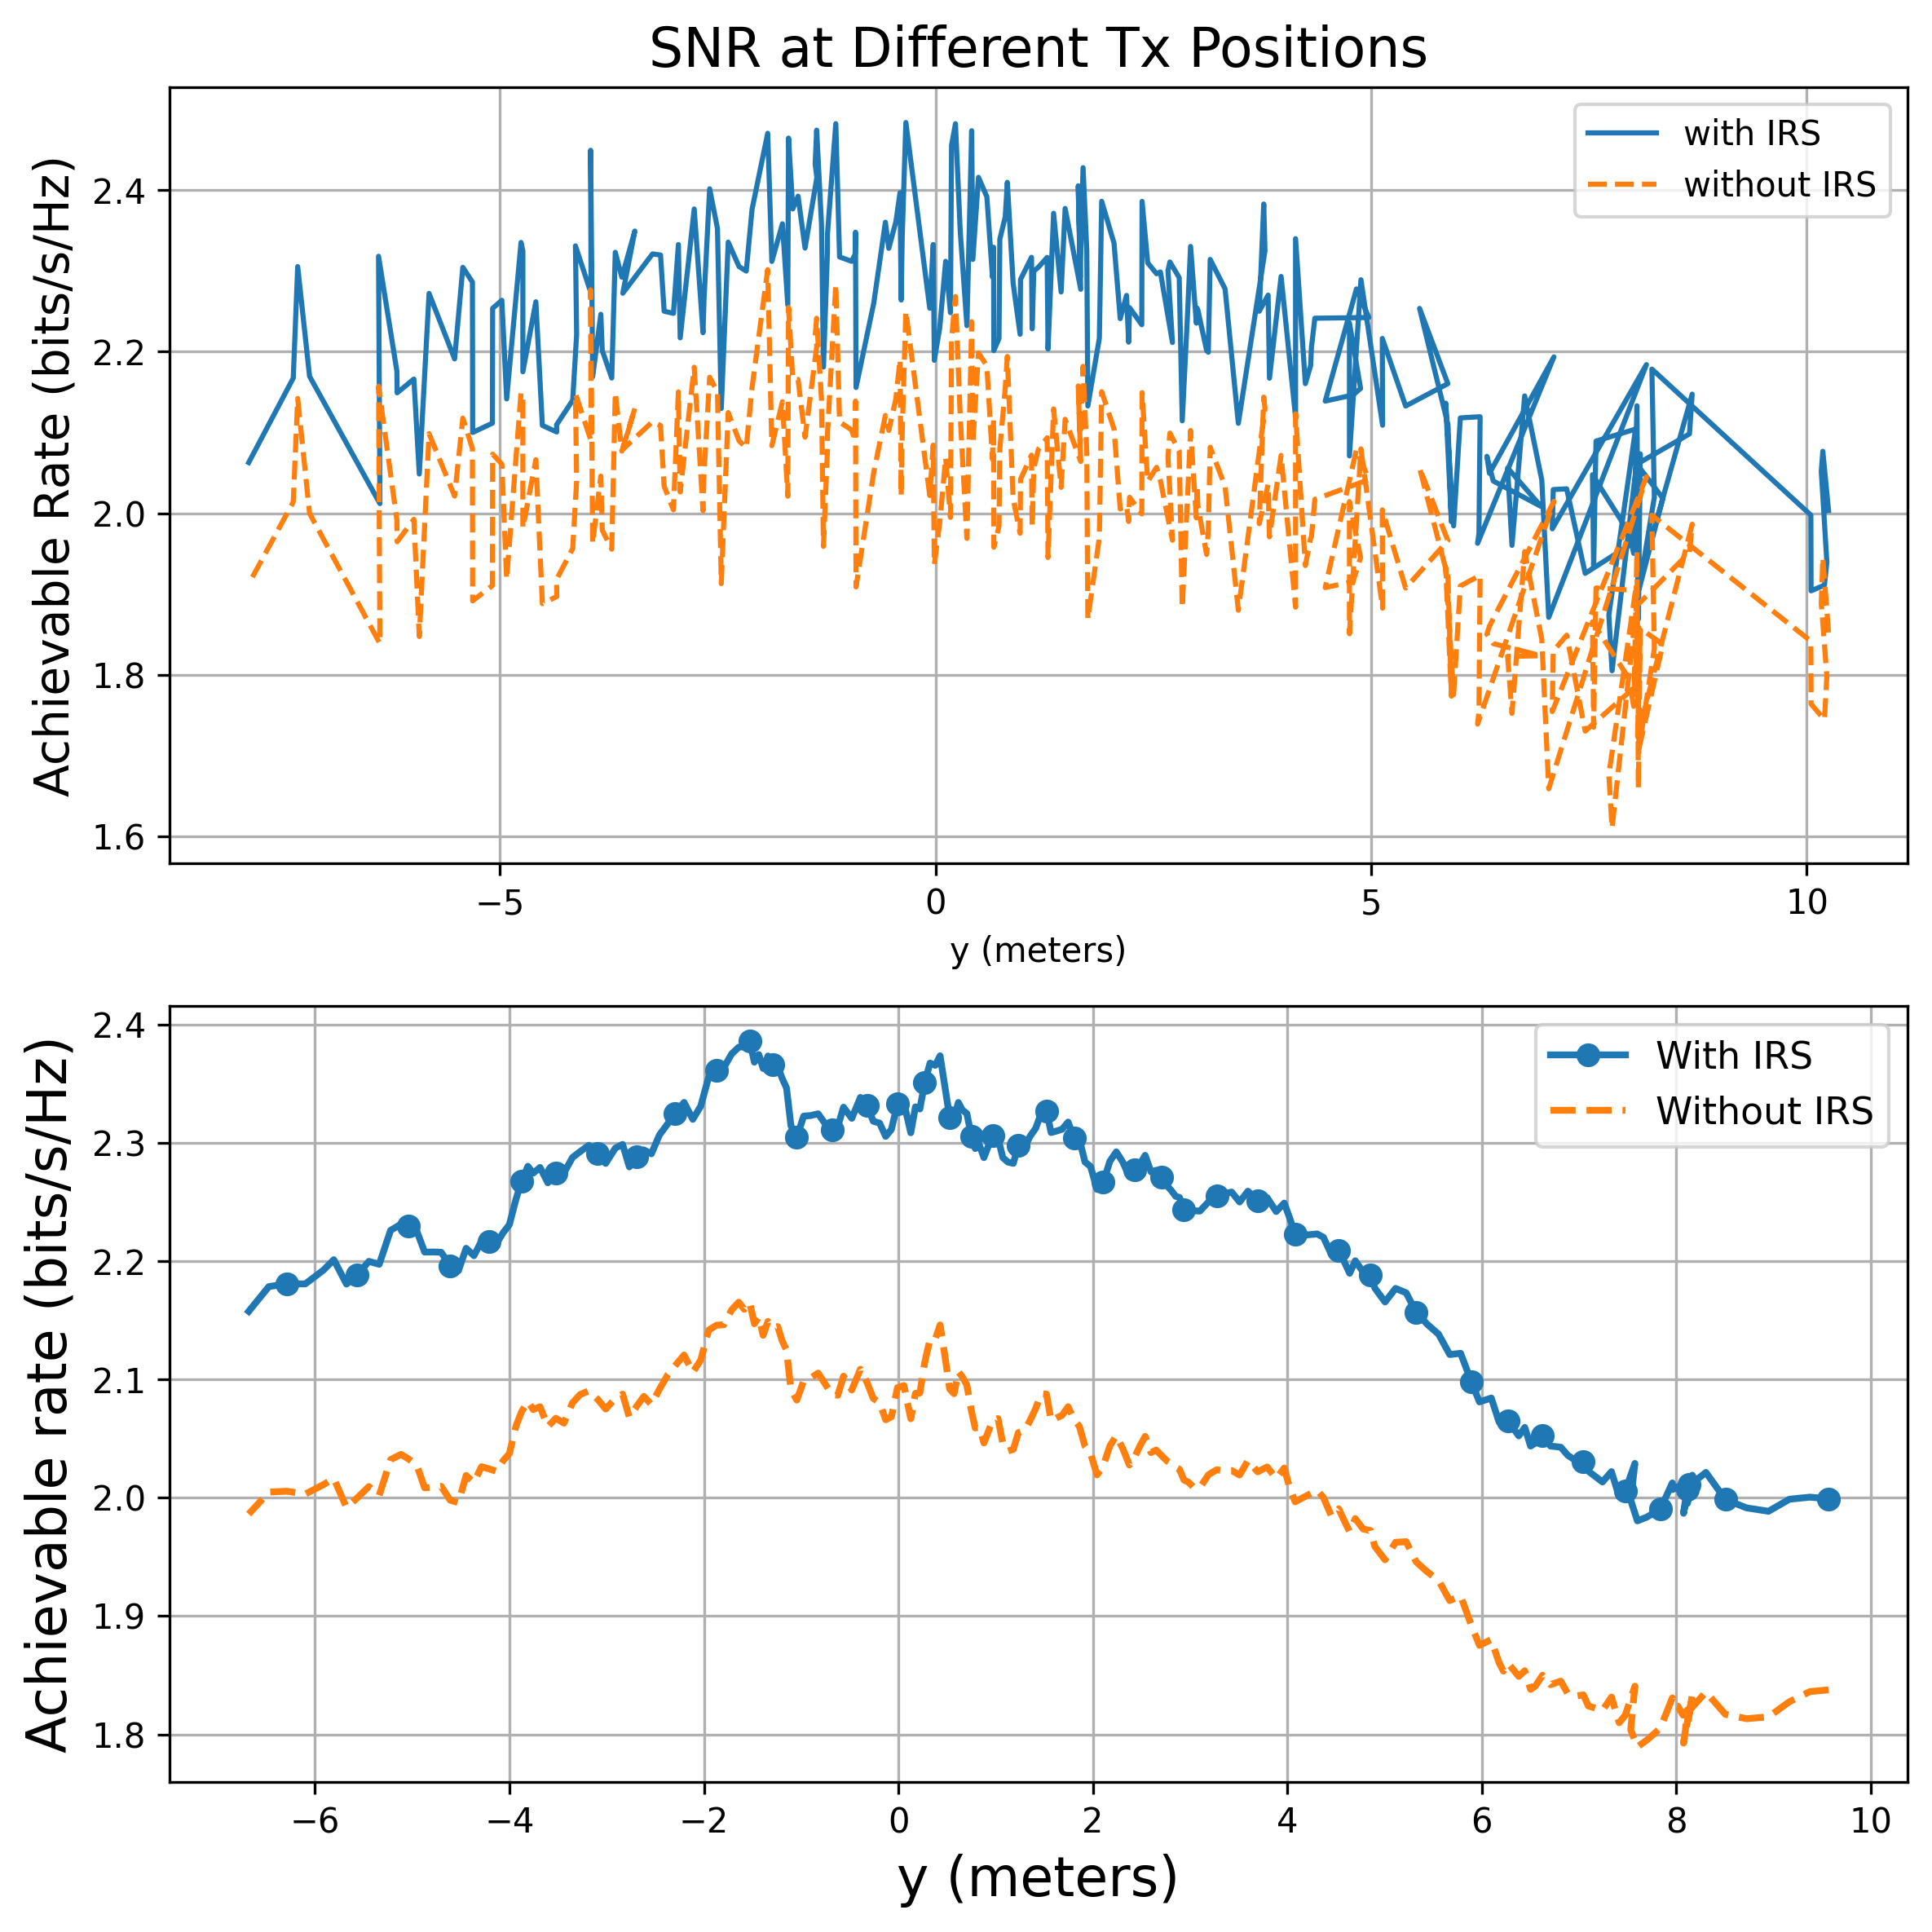

In [82]:
import matplotlib.ticker as ticker

n_trials = 5  # Number of trials
iteration_count = 5
n_angle_realizations = 5  # Number of angle realizations

# Initialize simulation parameters.
gamma_th_dB = 60  # Threshold SNR in dB
sigma_n_sqr_dBm = -60  # Noise power in dBm
p_sig_dBm = 30  # Signal power in dBm
fc = 24.2  # Carrier frequency
error_th = 1e-3  # Error threshold
path_loss_enabled = 1  # Flag for enabling path loss
K_r = 1  
K_c = 1  
sigma_sqr = 0.5  # Parameter sigma squared
L = 8  # no. of quantization levels
early_stop = 1  # Flag for enabling early stopping
random_initialization = 0  # Flag for enabling random initialization

# Create a Simulation object with the defined parameters.
sim = Simulation(sigma_n_sqr_dBm, gamma_th_dB, p_sig_dBm, n_trials,
                 fc, error_th, n_angle_realizations, path_loss_enabled, K_r,
                 K_c, sigma_sqr, iteration_count, L, early_stop, random_initialization)

# Define the positions of IRS and base station (bs).
pos_irs = np.array([0, 0, 2])
pos_bs = np.array([30, 1.5, 3])

num_points = reversed_filtered_angle_distance.shape[0]  # Number of points based on the filtered array
car_points = [None] * num_points
rate_ratios_per_angle = []
max_rate = 0
best_c_v = None

# Initialize arrays to store results for different configurations.
R_irs_full = np.zeros(num_points)
R_irs = np.zeros(num_points)
R_nirs = np.zeros(num_points)
P_o_irs_full = np.zeros(num_points)
P_o_irs = np.zeros(num_points)
P_o_nirs = np.zeros(num_points)

# Initialize arrays to store additional metrics
total_execution_times = np.zeros(num_points)
total_iteration_counts = np.zeros(num_points)
c_v = np.zeros(num_points)  # Array to store c_v values corresponding to car points

# Iterate over angle realizations.
for j in range(sim.angle_realizations):
    print(f'Iterating angle realization {j+1}')
    i = 0
    # Define IRS and base station nodes.
    irs = Node(1, 1, 16, 16, 0.5, pos_irs, 10)
    bs = Node(2, 4, 1, 2, 0.5, pos_bs, 5)

    # Define car nodes based on the filtered_angle_distance data
    car_points=[]
    for y in range(reversed_filtered_angle_distance.shape[0]):
        angle_rad = np.deg2rad(reversed_filtered_angle_distance[y, 0])  # Convert angle to radians
        distance = reversed_filtered_angle_distance[y, 1]
        pos_car = np.array([distance * np.cos(angle_rad), distance * np.sin(angle_rad), 1])
        car_points.append(Node(3, 1, 1, 1, 0.5, pos_car, 0))
        c_v[i] = pos_car[1]  # Store the y-coordinate for c_v
        i+=1
    # for y in range(-113,114):
    #     pos_car = np.array([0, y, 1])
    #     car_points.append(Node(3, 1, 1, 1, 0.5, pos_car, 0))
    #     c_v[i] = pos_car[1]  # Store the y-coordinate for c_v
    #     i+=1

    # Run the simulation trials.
    for n in tqdm(range(sim.n_trials), desc="Trials progress"):
        results = simulate_rate_vs_dist(bs, irs, car_points, sim)
        # Accumulate the results over trials.
        R_irs_full += results[0]
        R_irs += results[1]
        R_nirs += results[2]
        P_o_irs_full += results[3]
        P_o_irs += results[4]
        P_o_nirs += results[5]
        # total_execution_times += results[7]
        # total_iteration_counts += results[8]
    v = results[6]
    flops = results[7]
    # Extract the corresponding rate values
    # Find the index of cv=0
    index_cv_zero = np.argmin(np.abs(c_v))
    rate_with_IRS = R_irs_full[index_cv_zero] / (sim.n_trials * sim.angle_realizations)
    rate_without_IRS = R_nirs[index_cv_zero] / (sim.n_trials * sim.angle_realizations)
    rate_ratio = rate_with_IRS / rate_without_IRS
    rate_ratios_per_angle.append(rate_ratio)
    # Find the index of the maximum rate with IRS
    max_rate_with_IRS_index = np.argmax(R_irs_full)
    # Find the corresponding c_v value at which the maximum rate with IRS occurs
    best_c_v = c_v[max_rate_with_IRS_index]

    # Calculate the rates with IRS and without IRS at this c_v
    rate_with_IRS_at_best_c_v = R_irs_full[max_rate_with_IRS_index] / (sim.n_trials * sim.angle_realizations)
    rate_without_IRS_at_best_c_v = R_nirs[max_rate_with_IRS_index] / (sim.n_trials * sim.angle_realizations)

    # Calculate the ratio of rates with IRS to without IRS at the point of maximum rate with IRS
    rate_ratio_at_best_c_v = rate_with_IRS_at_best_c_v / rate_without_IRS_at_best_c_v


# Compute the ratio
#print(f"Final Optimal Phase shifts ",v)

print(f"Ratio of achievable rates at c_v=0: {rate_ratio:.4f}")
#print("Average Execution Times:", avg_execution_times)
# Output the results
print(f"Maximum rate with IRS occurs at c_v={best_c_v:.2f}")
print(f"Rate with IRS at this point: {rate_with_IRS_at_best_c_v:.4f}")
print(f"Rate without IRS at this point: {rate_without_IRS_at_best_c_v:.4f}")
print(f"Ratio of rates (with IRS to without IRS) at this point: {rate_ratio_at_best_c_v:.4f}")

def moving_average(data, window_size):
    """Calculate the moving average of the given data with specified window size"""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Choose a window size for smoothing
window_size = 10  # Adjust the window size as needed

# Apply moving average smoothing
smoothed_R_irs_full = moving_average(R_irs_full / (sim.n_trials * sim.angle_realizations), window_size)
smoothed_R_nirs = moving_average(R_nirs / (sim.n_trials * sim.angle_realizations), window_size)
smoothed_c_v = moving_average(c_v, window_size)  # Smooth the c_v values as well

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 8), dpi=300)

# Plot the original data in the first subplot
axs[0].plot(c_v, R_irs_full / (sim.n_trials * sim.angle_realizations), '-', linewidth=1.5)
axs[0].plot(c_v, R_nirs / (sim.n_trials * sim.angle_realizations), '--', linewidth=1.5)
axs[0].grid(True)
axs[0].xaxis.set_major_locator(ticker.MultipleLocator(5))
axs[0].set_xlabel('y (meters)')
#axs[0].set_xlim([10, -10])
axs[0].set_ylabel('Achievable Rate (bits/s/Hz)', fontsize=14)
axs[0].legend(['with IRS', 'without IRS'])
axs[0].set_title('SNR at Different Tx Positions', fontsize=16)

# Plot the smoothed data in the second subplot
axs[1].plot(smoothed_c_v, smoothed_R_irs_full, '-', linewidth=2, marker='o', markevery=5)
# Use a different line style with different markers for smoothed_R_nirs
axs[1].plot(smoothed_c_v, smoothed_R_nirs, linestyle='--', linewidth=2, markevery=5)
axs[1].grid(True)
axs[1].set_xlabel('y (meters)', fontsize=16)
#axs[1].set_xlim([10, -10])
axs[1].set_ylabel('Achievable rate (bits/s/Hz)', fontsize=16)
axs[1].legend(['With IRS', 'Without IRS'], fontsize=11)
#axs[1].set_title('Smoothed Rate at Different Tx Positions', fontsize=16)

plt.subplots_adjust(hspace=0.5) 
plt.tight_layout()
plt.show()

# Grouping

In [57]:
import numpy as np
from tqdm import tqdm

def grouping(m):

    # IRS configurations to iterate over
    if m==32:
        irs_configurations = [(1,1), (2, 2), (4, 4), (8, 8), (16,16), (32,32)]
    elif m==16:
        irs_configurations = [(1,1), (2, 2), (4, 4), (8, 8), (16,16)]
    else:
        irs_configurations = [(1,1), (2, 2), (4, 4), (8, 8)]

    # Results storage
    results_table = []

    for K_r, K_c in irs_configurations:
        # Initialize simulation for the current IRS configuration
        sim = Simulation(sigma_n_sqr_dBm, gamma_th_dB, p_sig_dBm, n_trials,
                        fc, error_th, n_angle_realizations, path_loss_enabled,
                        K_r, K_c, sigma_sqr, iteration_count, L, early_stop, random_initialization)
        
        # Assuming reversed_filtered_angle_distance is defined
        num_points = reversed_filtered_angle_distance.shape[0]  # Number of points based on the filtered array
        R_irs_full = np.zeros(num_points)
        R_nirs = np.zeros(num_points)
        c_v = np.zeros(num_points)  # Array to store c_v values corresponding to car points
        
        for j in range(sim.angle_realizations):
            print(f'Iterating angle realization {j+1}')
            i = 0
            irs = Node(1, 1, m, m, 0.5, pos_irs, 10)
            bs = Node(2, 4, 1, 2, 0.5, pos_bs, 5)
            
            car_points = []
            for y in range(reversed_filtered_angle_distance.shape[0]):
                angle_rad = np.deg2rad(reversed_filtered_angle_distance[y, 0])  # Convert angle to radians
                distance = reversed_filtered_angle_distance[y, 1]
                pos_car = np.array([distance * np.cos(angle_rad), distance * np.sin(angle_rad), 1])
                car_points.append(Node(3, 1, 1, 1, 0.5, pos_car, 0))
                c_v[i] = pos_car[1]  # Store the y-coordinate for c_v
                i += 1
            
            for n in tqdm(range(sim.n_trials), desc=f"Trials progress for K_r={K_r}, K_c={K_c}"):
                results = simulate_rate_vs_dist(bs, irs, car_points, sim)
                R_irs_full += results[0]
                R_nirs += results[2]
                
        # Find the index of the maximum rate with IRS
        rate_ratio = R_irs_full/R_nirs
        avg_rate_ratio = np.mean(rate_ratio)
        max_rate_ratio = np.max(rate_ratio)
        max_rate_with_IRS_index = np.argmax(R_irs_full)
        #max_rate_with_IRS_index = np.argmax(max_rate_ratio)
        best_c_v = c_v[max_rate_with_IRS_index]
        
        rate_with_IRS_at_best_c_v = R_irs_full[max_rate_with_IRS_index] / (sim.n_trials * sim.angle_realizations)
        rate_without_IRS_at_best_c_v = R_nirs[max_rate_with_IRS_index] / (sim.n_trials * sim.angle_realizations)
        rate_ratio_at_best_c_v = rate_with_IRS_at_best_c_v / rate_without_IRS_at_best_c_v
        # Calculate rate ratios at each c_v

        # Store the results for this IRS configuration
        results_table.append({
            'K_r': K_r, 'K_c': K_c, 'best_c_v': best_c_v, 
            'rate_with_IRS': rate_with_IRS_at_best_c_v, 
            'rate_without_IRS': rate_without_IRS_at_best_c_v, 
            # 'rate_ratio': rate_ratio_at_best_c_v,
            'max_rate_ratio': max_rate_ratio,
            'avg_rate_ratio': avg_rate_ratio 
        })
    return results_table

In [58]:
results_table_1024 = grouping(32)
# Display the results
print("Configuration (K_r x K_c) | Best c_v | Rate with IRS | Rate without IRS | Rate Ratio")
for result in results_table_1024:
    print(f"{result['K_r']}x{result['K_c']} | {result['best_c_v']:.2f} | {result['rate_with_IRS']:.4f} | {result['rate_without_IRS']:.4f} | {result['rate_ratio']:.4f} | {result['avg_rate_ratio']:.4f}")

Iterating angle realization 1


Trials progress for K_r=1, K_c=1: 100%|██████████| 5/5 [01:30<00:00, 18.01s/it]


Iterating angle realization 2


Trials progress for K_r=1, K_c=1: 100%|██████████| 5/5 [01:19<00:00, 15.91s/it]


Iterating angle realization 3


Trials progress for K_r=1, K_c=1: 100%|██████████| 5/5 [01:19<00:00, 15.97s/it]


Iterating angle realization 4


Trials progress for K_r=1, K_c=1: 100%|██████████| 5/5 [01:19<00:00, 15.96s/it]


Iterating angle realization 5


Trials progress for K_r=1, K_c=1: 100%|██████████| 5/5 [01:23<00:00, 16.78s/it]


Iterating angle realization 1


Trials progress for K_r=2, K_c=2:   0%|          | 0/5 [00:00<?, ?it/s]/var/folders/dk/nc7t5lbs3_nbbj6t27jwgxdc0000gn/T/ipykernel_61877/3437718794.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  H_r_exp[:, :, i] = np.reshape(H_r[i, :], (N_r, N_c))
Trials progress for K_r=2, K_c=2: 100%|██████████| 5/5 [00:21<00:00,  4.23s/it]


Iterating angle realization 2


Trials progress for K_r=2, K_c=2: 100%|██████████| 5/5 [00:19<00:00,  3.94s/it]


Iterating angle realization 3


Trials progress for K_r=2, K_c=2: 100%|██████████| 5/5 [00:19<00:00,  3.87s/it]


Iterating angle realization 4


Trials progress for K_r=2, K_c=2: 100%|██████████| 5/5 [00:18<00:00,  3.67s/it]


Iterating angle realization 5


Trials progress for K_r=2, K_c=2: 100%|██████████| 5/5 [00:19<00:00,  3.92s/it]


Iterating angle realization 1


Trials progress for K_r=4, K_c=4: 100%|██████████| 5/5 [00:08<00:00,  1.67s/it]


Iterating angle realization 2


Trials progress for K_r=4, K_c=4: 100%|██████████| 5/5 [00:09<00:00,  1.99s/it]


Iterating angle realization 3


Trials progress for K_r=4, K_c=4: 100%|██████████| 5/5 [00:08<00:00,  1.74s/it]


Iterating angle realization 4


Trials progress for K_r=4, K_c=4: 100%|██████████| 5/5 [00:08<00:00,  1.72s/it]


Iterating angle realization 5


Trials progress for K_r=4, K_c=4: 100%|██████████| 5/5 [00:09<00:00,  1.87s/it]


Iterating angle realization 1


Trials progress for K_r=8, K_c=8: 100%|██████████| 5/5 [00:06<00:00,  1.40s/it]


Iterating angle realization 2


Trials progress for K_r=8, K_c=8: 100%|██████████| 5/5 [00:07<00:00,  1.41s/it]


Iterating angle realization 3


Trials progress for K_r=8, K_c=8: 100%|██████████| 5/5 [00:07<00:00,  1.46s/it]


Iterating angle realization 4


Trials progress for K_r=8, K_c=8: 100%|██████████| 5/5 [00:07<00:00,  1.51s/it]


Iterating angle realization 5


Trials progress for K_r=8, K_c=8: 100%|██████████| 5/5 [00:07<00:00,  1.41s/it]


Iterating angle realization 1


Trials progress for K_r=16, K_c=16: 100%|██████████| 5/5 [00:06<00:00,  1.34s/it]


Iterating angle realization 2


Trials progress for K_r=16, K_c=16: 100%|██████████| 5/5 [00:06<00:00,  1.34s/it]


Iterating angle realization 3


Trials progress for K_r=16, K_c=16: 100%|██████████| 5/5 [00:06<00:00,  1.36s/it]


Iterating angle realization 4


Trials progress for K_r=16, K_c=16: 100%|██████████| 5/5 [00:06<00:00,  1.36s/it]


Iterating angle realization 5


Trials progress for K_r=16, K_c=16: 100%|██████████| 5/5 [00:06<00:00,  1.37s/it]


Iterating angle realization 1


Trials progress for K_r=32, K_c=32: 100%|██████████| 5/5 [00:06<00:00,  1.31s/it]


Iterating angle realization 2


Trials progress for K_r=32, K_c=32: 100%|██████████| 5/5 [00:06<00:00,  1.34s/it]


Iterating angle realization 3


Trials progress for K_r=32, K_c=32: 100%|██████████| 5/5 [00:06<00:00,  1.35s/it]


Iterating angle realization 4


Trials progress for K_r=32, K_c=32: 100%|██████████| 5/5 [00:06<00:00,  1.36s/it]


Iterating angle realization 5


Trials progress for K_r=32, K_c=32: 100%|██████████| 5/5 [00:06<00:00,  1.31s/it]

Configuration (K_r x K_c) | Best c_v | Rate with IRS | Rate without IRS | Rate Ratio


KeyError: 'rate_ratio'

In [64]:
results_table_256 = grouping(16)
# Display the results
print("Configuration (K_r x K_c) | Best c_v | Rate with IRS | Rate without IRS | Rate Ratio")
for result in results_table_256:
    print(f"{result['K_r']}x{result['K_c']} | {result['best_c_v']:.2f} | {result['rate_with_IRS']:.4f} | {result['rate_without_IRS']:.4f} | {result['max_rate_ratio']:.4f} | {result['avg_rate_ratio']:.4f}")

Iterating angle realization 1


Trials progress for K_r=1, K_c=1: 100%|██████████| 5/5 [00:15<00:00,  3.15s/it]


Iterating angle realization 2


Trials progress for K_r=1, K_c=1: 100%|██████████| 5/5 [00:13<00:00,  2.68s/it]


Iterating angle realization 3


Trials progress for K_r=1, K_c=1: 100%|██████████| 5/5 [00:13<00:00,  2.64s/it]


Iterating angle realization 4


Trials progress for K_r=1, K_c=1: 100%|██████████| 5/5 [00:13<00:00,  2.79s/it]


Iterating angle realization 5


Trials progress for K_r=1, K_c=1: 100%|██████████| 5/5 [00:17<00:00,  3.50s/it]


Iterating angle realization 1


Trials progress for K_r=2, K_c=2:   0%|          | 0/5 [00:00<?, ?it/s]/var/folders/dk/nc7t5lbs3_nbbj6t27jwgxdc0000gn/T/ipykernel_61877/3437718794.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  H_r_exp[:, :, i] = np.reshape(H_r[i, :], (N_r, N_c))
Trials progress for K_r=2, K_c=2: 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Iterating angle realization 2


Trials progress for K_r=2, K_c=2: 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Iterating angle realization 3


Trials progress for K_r=2, K_c=2: 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


Iterating angle realization 4


Trials progress for K_r=2, K_c=2: 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


Iterating angle realization 5


Trials progress for K_r=2, K_c=2: 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Iterating angle realization 1


Trials progress for K_r=4, K_c=4: 100%|██████████| 5/5 [00:01<00:00,  2.99it/s]


Iterating angle realization 2


Trials progress for K_r=4, K_c=4: 100%|██████████| 5/5 [00:01<00:00,  2.91it/s]


Iterating angle realization 3


Trials progress for K_r=4, K_c=4: 100%|██████████| 5/5 [00:01<00:00,  2.86it/s]


Iterating angle realization 4


Trials progress for K_r=4, K_c=4: 100%|██████████| 5/5 [00:01<00:00,  2.75it/s]


Iterating angle realization 5


Trials progress for K_r=4, K_c=4: 100%|██████████| 5/5 [00:01<00:00,  3.00it/s]


Iterating angle realization 1


Trials progress for K_r=8, K_c=8: 100%|██████████| 5/5 [00:01<00:00,  3.69it/s]


Iterating angle realization 2


Trials progress for K_r=8, K_c=8: 100%|██████████| 5/5 [00:01<00:00,  3.75it/s]


Iterating angle realization 3


Trials progress for K_r=8, K_c=8: 100%|██████████| 5/5 [00:01<00:00,  3.72it/s]


Iterating angle realization 4


Trials progress for K_r=8, K_c=8: 100%|██████████| 5/5 [00:01<00:00,  3.62it/s]


Iterating angle realization 5


Trials progress for K_r=8, K_c=8: 100%|██████████| 5/5 [00:01<00:00,  3.81it/s]


Iterating angle realization 1


Trials progress for K_r=16, K_c=16: 100%|██████████| 5/5 [00:01<00:00,  4.03it/s]


Iterating angle realization 2


Trials progress for K_r=16, K_c=16: 100%|██████████| 5/5 [00:01<00:00,  3.95it/s]


Iterating angle realization 3


Trials progress for K_r=16, K_c=16: 100%|██████████| 5/5 [00:01<00:00,  4.10it/s]


Iterating angle realization 4


Trials progress for K_r=16, K_c=16: 100%|██████████| 5/5 [00:01<00:00,  3.73it/s]


Iterating angle realization 5


Trials progress for K_r=16, K_c=16: 100%|██████████| 5/5 [00:01<00:00,  4.05it/s]

Configuration (K_r x K_c) | Best c_v | Rate with IRS | Rate without IRS | Rate Ratio
1x1 | -0.92 | 2.4781 | 2.2553 | 1.1406 | 1.1067
2x2 | 4.97 | 2.3744 | 2.2798 | 1.0722 | 1.0471
4x4 | 3.78 | 2.3586 | 2.3320 | 1.0330 | 1.0180
8x8 | -2.46 | 2.2728 | 2.2541 | 1.0181 | 1.0070
16x16 | -1.50 | 2.3028 | 2.3010 | 1.0062 | 1.0010


In [60]:
results_table_64 = grouping(8)
# Display the results
print("Configuration (K_r x K_c) | Best c_v | Rate with IRS | Rate without IRS | Rate Ratio | Avg rate")
for result in results_table_64:
    print(f"{result['K_r']}x{result['K_c']} | {result['best_c_v']:.2f} | {result['rate_with_IRS']:.4f} | {result['rate_without_IRS']:.4f} | {result['max_rate_ratio']:.4f} | {result['avg_rate_ratio']:.4f}")

Iterating angle realization 1


Trials progress for K_r=1, K_c=1: 100%|██████████| 5/5 [00:02<00:00,  2.25it/s]


Iterating angle realization 2


Trials progress for K_r=1, K_c=1: 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]


Iterating angle realization 3


Trials progress for K_r=1, K_c=1: 100%|██████████| 5/5 [00:02<00:00,  2.27it/s]


Iterating angle realization 4


Trials progress for K_r=1, K_c=1: 100%|██████████| 5/5 [00:02<00:00,  2.26it/s]


Iterating angle realization 5


Trials progress for K_r=1, K_c=1: 100%|██████████| 5/5 [00:02<00:00,  2.29it/s]


Iterating angle realization 1


Trials progress for K_r=2, K_c=2:   0%|          | 0/5 [00:00<?, ?it/s]/var/folders/dk/nc7t5lbs3_nbbj6t27jwgxdc0000gn/T/ipykernel_61877/3437718794.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  H_r_exp[:, :, i] = np.reshape(H_r[i, :], (N_r, N_c))
Trials progress for K_r=2, K_c=2: 100%|██████████| 5/5 [00:00<00:00,  5.17it/s]


Iterating angle realization 2


Trials progress for K_r=2, K_c=2: 100%|██████████| 5/5 [00:00<00:00,  5.15it/s]


Iterating angle realization 3


Trials progress for K_r=2, K_c=2: 100%|██████████| 5/5 [00:00<00:00,  5.20it/s]


Iterating angle realization 4


Trials progress for K_r=2, K_c=2: 100%|██████████| 5/5 [00:00<00:00,  5.16it/s]


Iterating angle realization 5


Trials progress for K_r=2, K_c=2: 100%|██████████| 5/5 [00:01<00:00,  4.80it/s]


Iterating angle realization 1


Trials progress for K_r=4, K_c=4: 100%|██████████| 5/5 [00:00<00:00,  7.78it/s]


Iterating angle realization 2


Trials progress for K_r=4, K_c=4: 100%|██████████| 5/5 [00:00<00:00,  7.88it/s]


Iterating angle realization 3


Trials progress for K_r=4, K_c=4: 100%|██████████| 5/5 [00:00<00:00,  7.85it/s]


Iterating angle realization 4


Trials progress for K_r=4, K_c=4: 100%|██████████| 5/5 [00:00<00:00,  7.85it/s]


Iterating angle realization 5


Trials progress for K_r=4, K_c=4: 100%|██████████| 5/5 [00:00<00:00,  7.86it/s]


Iterating angle realization 1


Trials progress for K_r=8, K_c=8: 100%|██████████| 5/5 [00:00<00:00,  8.76it/s]


Iterating angle realization 2


Trials progress for K_r=8, K_c=8: 100%|██████████| 5/5 [00:00<00:00,  9.08it/s]


Iterating angle realization 3


Trials progress for K_r=8, K_c=8: 100%|██████████| 5/5 [00:00<00:00,  9.11it/s]


Iterating angle realization 4


Trials progress for K_r=8, K_c=8: 100%|██████████| 5/5 [00:00<00:00,  9.14it/s]


Iterating angle realization 5


Trials progress for K_r=8, K_c=8: 100%|██████████| 5/5 [00:00<00:00,  9.04it/s]

Configuration (K_r x K_c) | Best c_v | Rate with IRS | Rate without IRS | Rate Ratio | Avg rate
1x1 | 0.28 | 2.3331 | 2.2793 | 1.0341 | 1.0226
2x2 | 1.69 | 2.3334 | 2.3081 | 1.0169 | 1.0113
4x4 | 0.05 | 2.2676 | 2.2548 | 1.0089 | 1.0048
8x8 | 0.65 | 2.2406 | 2.2411 | 1.0027 | 1.0005


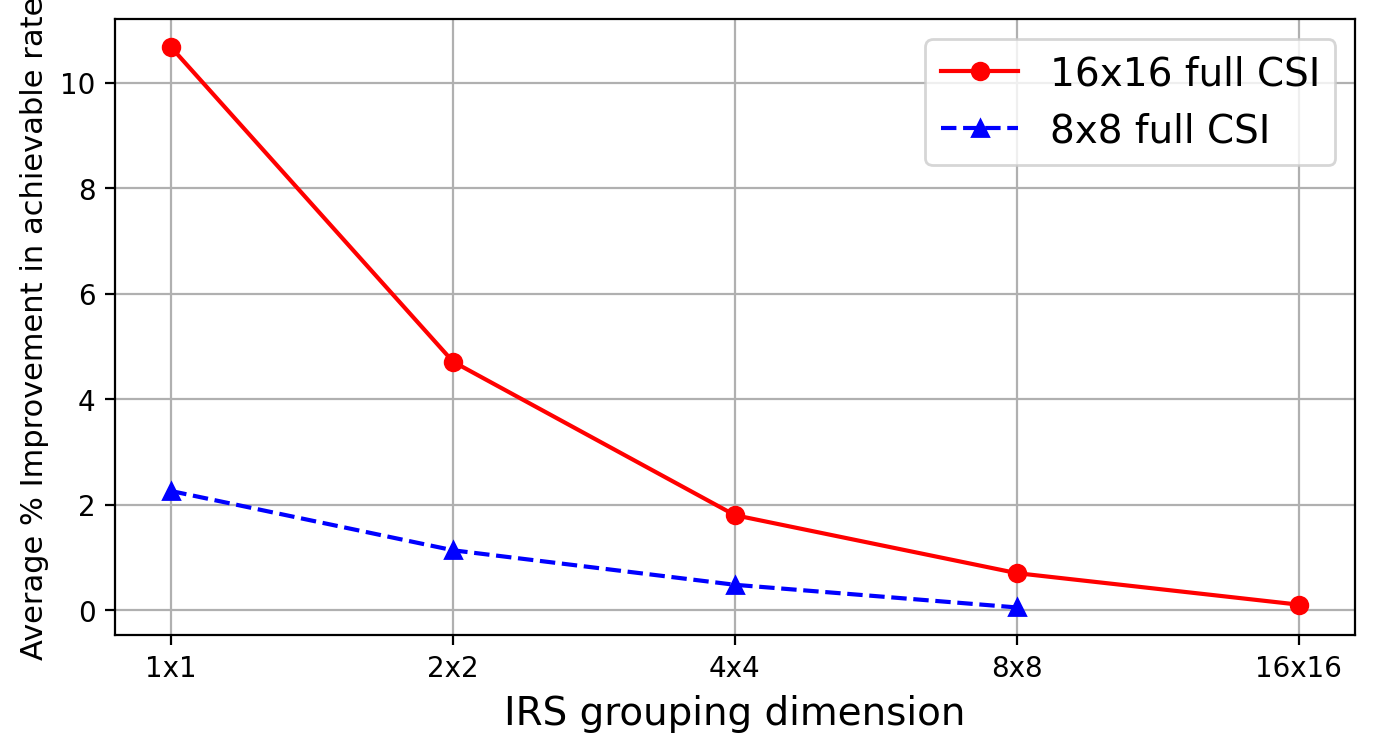

In [70]:
import matplotlib.pyplot as plt

# Calculate % improvement in SNR (rate_ratio - 1) * 100
#improvement_table_1024 = [(result['avg_rate_ratio'] - 1) * 100 for result in results_table_1024]
improvement_table_256 = [(result['avg_rate_ratio'] - 1) * 100 for result in results_table_256]
improvement_table_64 = [(result['avg_rate_ratio'] - 1) * 100 for result in results_table_64]

# Grouping schemes
#grouping_schemes_1024 = [f"{result['K_r']}x{result['K_c']}" for result in results_table_1024]
grouping_schemes_256 = [f"{result['K_r']}x{result['K_c']}" for result in results_table_256]
grouping_schemes_64 = [f"{result['K_r']}x{result['K_c']}" for result in results_table_64]

# Plotting
plt.figure(figsize=(8, 4), dpi=200)
#plt.plot(grouping_schemes_1024, improvement_table_1024, label='32x32 Full CSI', color='blue', marker='o')  # Added marker here
plt.plot(grouping_schemes_256, improvement_table_256, label='16x16 full CSI', color='red', marker='o')  # And here
plt.plot(grouping_schemes_64, improvement_table_64, label='8x8 full CSI', linestyle='dashed', color='blue', marker='^')  # And here


# Labeling
plt.xlabel('IRS grouping dimension', fontsize=14)
plt.ylabel('Average % Improvement in achievable rate', fontsize=11)
#plt.title('Avg % Improvement in Rate vs Grouping dimension', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

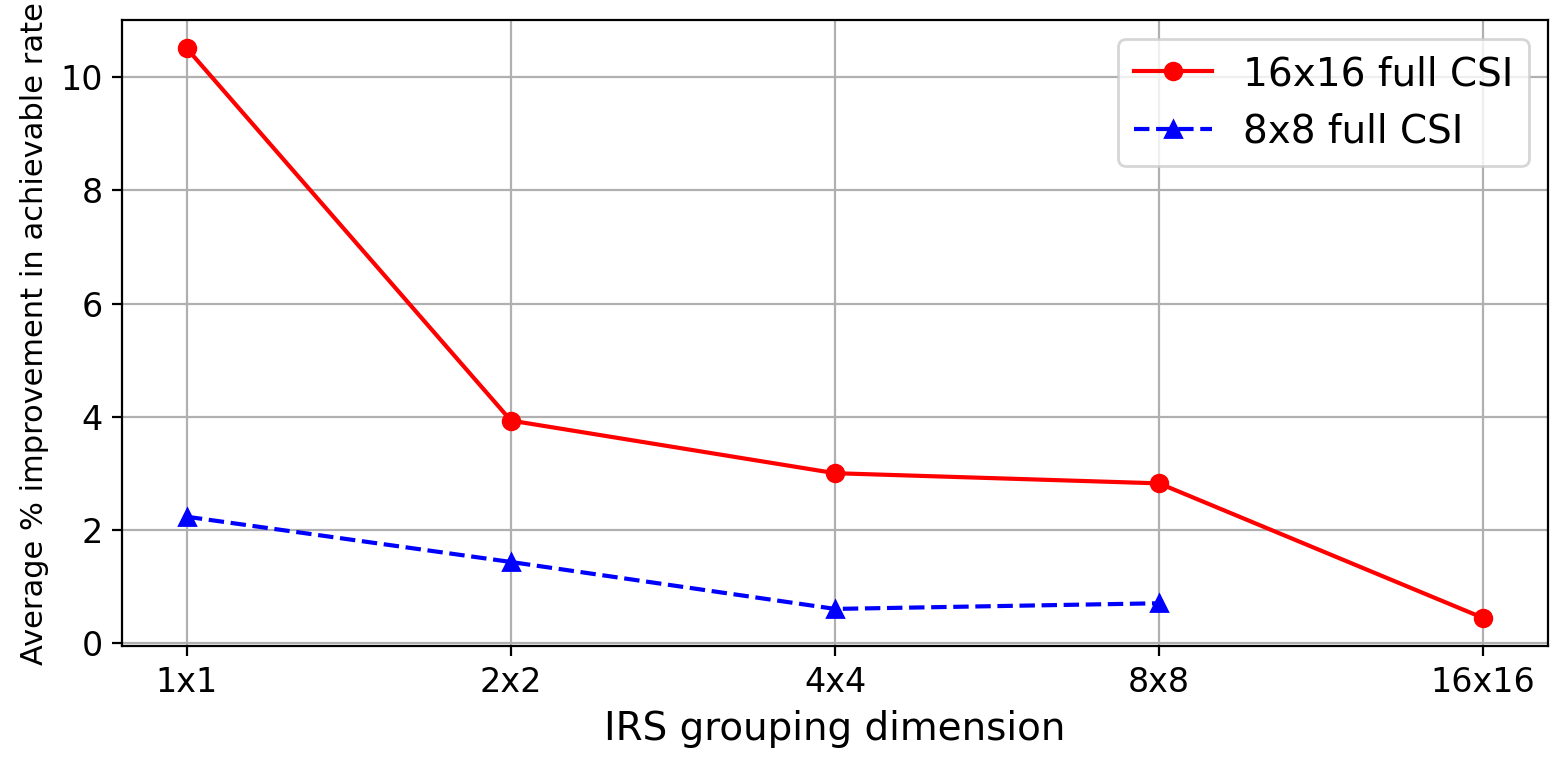

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data
grouping_schemes = ['1x1', '2x2', '4x4', '8x8', '16x16']
array_16x16 = np.array([1.1051, 1.0393, 1.0300, 1.0282, 1.0044])
array_8x8 = np.array([1.0223, 1.0143, 1.0060, 1.0070, np.nan])

# Calculate percentage improvements
improvement_16x16 = (array_16x16 - 1) * 100
improvement_8x8 = (array_8x8 - 1) * 100

# Plotting
plt.figure(figsize=(8, 4), dpi=200)
plt.plot(grouping_schemes, improvement_16x16, label='16x16 full CSI', color='red', marker='o')
plt.plot(grouping_schemes[:-1], improvement_8x8[:-1], label='8x8 full CSI', linestyle='dashed', color='blue', marker='^')

# Labeling
plt.xlabel('IRS grouping dimension', fontsize=14)
plt.ylabel('Average % improvement in achievable rate', fontsize=11)
plt.legend(fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.savefig('rate_improvement.png', dpi=300, bbox_inches='tight')
plt.show()

# Extras

In [ ]:
print(v.shape)

(256,)


2023-10-30 05:05:03.546859: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2/2 [==============================] - 0s 2ms/step
MSE for 'with IRS': 0.0207


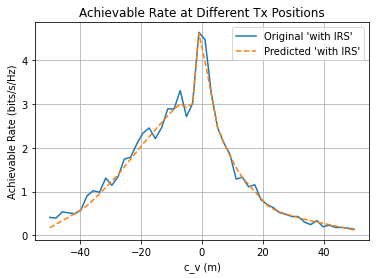

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Prepare the data
X = np.array(c_v).reshape(-1, 1)
y_irs_original = R_irs_full / (sim.n_trials * sim.angle_realizations)
y_nirs_original = R_nirs / (sim.n_trials * sim.angle_realizations)

X_train, X_val, y_irs_train, y_irs_val = train_test_split(X, y_irs_original, test_size=0.2, random_state=42)

# Build the model for 'with IRS'
model_irs = Sequential()
model_irs.add(Dense(128, input_dim=1, activation='relu'))
model_irs.add(Dense(128, activation='relu'))
model_irs.add(Dense(64, activation='relu'))
model_irs.add(Dense(1))

model_irs.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history_irs = model_irs.fit(X_train, y_irs_train, validation_data=(X_val, y_irs_val), epochs=1000, verbose=0)

# Predict using the model
y_irs_pred = model_irs.predict(X).flatten()

# Calculate MSE for 'with IRS'
mse_irs = mean_squared_error(y_irs_original, y_irs_pred)
print(f"MSE for 'with IRS': {mse_irs:.4f}")

# Similarly, you can create, train, and predict a model for 'without IRS'

# Plotting the results
plt.figure()
plt.plot(c_v, y_irs_original, '-', linewidth=1.5, label="Original 'with IRS'")
plt.plot(c_v, y_irs_pred, '--', linewidth=1.5, label="Predicted 'with IRS'")
# You can add 'without IRS' predictions here in a similar manner.
plt.legend()
plt.xlabel('c_v (m)')
plt.ylabel('Achievable Rate (bits/s/Hz)')
plt.title('Achievable Rate at Different Tx Positions')
plt.grid(True)
plt.show()


# LiDAR integration

In [ ]:
import numpy as np
from scipy.io import loadmat

# Load MATLAB file
mat_data = loadmat('Lidar_data_977.mat')

# Print keys
print(mat_data.keys())

# Access specific data
# For example, if your .mat file contains a variable named 'data'
data = mat_data['data']
print(data.shape)
print(data)

dict_keys(['__header__', '__version__', '__globals__', 'data'])
(216, 2)
[[ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.07775993e+00]
 [ 0.00000000e+00 -2.06548809e+00]
 [ 0.00000000e+00 -2.05130729e+00]
 [ 0.00000000e+00 -2.01776424e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.99131159e+00]
 [ 0.00000000e+00 -1.97685809e+00]
 [ 0.00000000e+00 -1.95749584e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.72923950e+00]
 [ 0.00000000e+00 -1.71424057e+00]
 [ 0.00000000e+00 -1.69542374e+00]
 [ 0.00000000e+00 -1.68778793e+00]
 [ 3.42064128e+00 -1.67360713e+00]
 [ 0.00000000e+00

# Phase shift prediction

## Generating dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import joblib
from tqdm import tqdm

# Assuming you have the following functions already defined:
# simulate_rate_vs_dist()

# Generate random positions
def generate_random_positions(n):
    pos_irs_list = [np.array([np.random.uniform(0, 30), np.random.uniform(-10, 10), np.random.uniform(0, 5)]) for _ in range(n)]
    pos_bs_list = [np.array([np.random.uniform(0, 30), np.random.uniform(-10, 10), np.random.uniform(0, 5)]) for _ in range(n)]
    #pos_car_list = [np.array([np.random.uniform(0, 30), np.random.uniform(-10, 10), np.random.uniform(0, 5)]) for _ in range(n)]
    return pos_irs_list, pos_bs_list #, pos_car_list

# Simulate the rates and generate training data
def generate_training_data(n,sim):
    pos_irs_list, pos_bs_list= generate_random_positions(n)
    X_train = []
    y_train = []
    i=0
    for y in np.linspace(-50, 50, num_points):
        pos_car = np.array([1.5, y, 1])
        car_points[i] = Node(3, 1, 1, 1, 0.5, pos_car, 0)
        c_v[i] = y
        i += 1
    
    for i in tqdm(range(n), desc="Generating training data"):
        pos_irs, pos_bs = pos_irs_list[i], pos_bs_list[i]
        irs = Node(1, 1, 16, 16, 0.5, pos_irs, 10)
        bs = Node(2, 4, 1, 2, 0.5, pos_bs, 5)
         
        _, _, _, _, _, _, v = simulate_rate_vs_dist(bs, irs, car_points, sim)
        
        # Converting complex to real, by using v.real and v.imag
        y_train.append([v.real, v.imag])
        
        # Append positions as features
        X_train.append(np.concatenate([pos_irs, pos_bs, pos_car]))
        
    return np.array(X_train), np.array(y_train)

# Generate training data
n_samples = 20
X, y = generate_training_data(n_samples,sim)

Generating training data: 100%|██████████| 20/20 [27:14<00:00, 81.72s/it]


ValueError: Found array with dim 3. MLPRegressor expected <= 2.

In [ ]:
import pandas as pd

# Flatten the data
y_flattened = y.reshape(y.shape[0], -1)  # This will transform y into shape (20, 512)

# Convert to pandas DataFrame
df_X = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])
df_y = pd.DataFrame(y_flattened, columns=[f'y_{i}' for i in range(y_flattened.shape[1])])
df = pd.concat([df_X, df_y], axis=1)

# Save to CSV file
df.to_csv('training_data.csv', index=False)

NameError: name 'y' is not defined

## Reading data and predicting

In [ ]:
# Load data from CSV
df = pd.read_csv('training_data.csv')

# Split into features and targets
X_columns = [col for col in df.columns if 'Feature_' in col]
y_columns = [col for col in df.columns if 'y_' in col]

X = df[X_columns].values
y_flattened = df[y_columns].values

# If you want y to be reshaped to its original shape (20, 2, 256):
y = y_flattened.reshape(-1, 2, 256)

In [ ]:
from sklearn.neural_network import MLPRegressor
import joblib

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train.reshape(y_train.shape[0], -1)
y_val = y_val.reshape(y_val.shape[0], -1)

# Train a simple neural network regressor
model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Validate the model
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(f"Validation MSE: {mse}")

# Save the model
joblib.dump(model, 'phase_angle_predictor.pkl')

# Load the model for prediction
model = joblib.load('phase_angle_predictor.pkl')

def predict_phase_angles(pos_irs, pos_bs, pos_car):
    x = np.concatenate([pos_irs, pos_bs, pos_car])
    predicted_phase_angles = model.predict([x])
    # Convert back to complex array
    complex_vals = predicted_phase_angles[0][::2] + 1j * predicted_phase_angles[0][1::2]
    return complex_vals

# Example of using predict_phase_angles function
pos_irs_new = np.array([10, 0, 2])
pos_bs_new = np.array([5, -5, 3])
pos_car_new = np.array([1.5, 6, 1])
predicted_phase_angle = predict_phase_angles(pos_irs_new, pos_bs_new, pos_car_new)
print(f"Predicted Phase Angle for new positions: {predicted_phase_angle}")

Validation MSE: 1.2194167583180493
Predicted Phase Angle for new positions: [ 1.45075874e-02-5.49627237e-01j -3.83684136e-03+8.22952602e-01j
  2.64078830e-01+9.57282460e-01j  3.52212278e-02+5.88933336e-01j
 -3.27683903e-01-3.46952985e-01j -6.68263516e-01-6.46225407e-01j
 -4.73209712e-01+5.79465363e-03j  2.77000809e-02+1.09707302e-01j
 -9.81159210e-01-2.28668042e-01j -7.93307195e-01+1.10264775e+00j
  2.59888344e-01+3.19058702e-02j  3.41334301e-01+6.62438630e-01j
  4.12635438e-01-3.59028687e-01j -1.01043267e+00-8.32844428e-01j
 -2.06681799e-01-9.17463962e-02j -5.80672624e-01-6.19498263e-01j
 -7.08814495e-01-1.88346751e-01j  3.52584976e-01-7.17275774e-02j
  3.10686325e-01-1.61963533e-02j -5.05717071e-02+2.43288908e-02j
 -9.34603751e-02-8.24723963e-01j -1.01847168e+00-9.98219506e-01j
  1.82559869e-01-2.46989199e-01j -6.48687810e-02-5.83433306e-01j
 -6.94640000e-01-8.66903146e-01j  1.69563312e-01+6.97466045e-01j
 -2.94619533e-01-8.84366319e-02j -5.04505600e-01+7.67153631e-01j
 -1.84975421e-

In [ ]:
print(predicted_phase_angle.shape)

(256,)


In [ ]:
from sklearn.metrics import r2_score

magnitude_true = np.abs(y_val)
magnitude_pred = np.abs(y_pred)
phase_true = np.angle(y_val)
phase_pred = np.angle(y_pred)

magnitude_error = np.mean(np.abs(magnitude_true - magnitude_pred))
phase_error = np.mean(np.abs(phase_true - phase_pred))
mae = np.mean(np.abs(y_val - y_pred))
r2 = r2_score(y_val, y_pred)
print(magnitude_error)
print(phase_error)
print(mae)
print(r2)

0.4912837642658699
1.5477866149766122
0.8864474877425279
-2.9025276922365535e+30


## Prediction

### Plot_rate_vs_txpower

In [44]:
def simulate_rate_vs_txpower(bs, irs, car, sim, p_sig_dBm):
    size_p_sig = len(p_sig_dBm)
    R_irs_full = np.zeros(size_p_sig)
    R_irs = np.zeros(size_p_sig)
    R_nirs = np.zeros(size_p_sig)

    d_d = dist_3d(bs['pos'], car['pos'])
    d_r = dist_3d(bs['pos'], irs['pos'])
    d_v = dist_3d(irs['pos'], car['pos'])

    h_d = generate_MIMO_channel(car, bs, d_d, sim['fc'], 0, 1e15, 1, sim['path_loss_enabled'])
    H_r = generate_MIMO_channel(irs, bs, d_r, sim['fc'], 0, 2, 2, sim['path_loss_enabled'])
    h_v = generate_MIMO_channel(car, irs, d_v, sim['fc'], 0, 1, 1, sim['path_loss_enabled'])

    h_d_1 = generate_MIMO_channel(car, bs, d_d, sim['fc'], 0, 0, 1, sim['path_loss_enabled'])
    H_r_1 = generate_MIMO_channel(irs, bs, d_r, sim['fc'], 0, 0, 2, sim['path_loss_enabled'])
    h_v_1 = generate_MIMO_channel(car, irs, d_v, sim['fc'], 0, 0, 1, sim['path_loss_enabled'])

    for i in range(size_p_sig):
        p_sig = db2pow(p_sig_dBm[i] - 30)

        # passive beamforming with full CSI
        _, R_irs_full[i] = optimal_phase_shift3(h_d, H_r, h_v, sim['error_th'], sim['sigma_n_sqr'], p_sig, sim['K_r'], sim['K_c'], irs['Ny'], irs['Nz'], sim['iteration_count'], sim['L'], sim['early_stop'], sim['random_initilization'])

        R_nirs[i] = achievable_rate(h_d, sim['sigma_n_sqr'], p_sig)

        # position based passive beamforming
        v, _ = optimal_phase_shift3(h_d_1, H_r_1, h_v_1, sim['error_th'], sim['sigma_n_sqr'], p_sig, sim['K_r'], sim['K_c'], irs['Ny'], irs['Nz'], sim['iteration_count'], sim['L'], sim['early_stop'], sim['random_initilization'])

        R_irs[i] = achievable_rate(h_d + H_r @ np.diag(v) @ h_v, sim['sigma_n_sqr'], p_sig)

    return R_irs_full, R_irs, R_nirs

In [45]:
gamma_th_dB = 60  # SNR threshold for outage
sigma_n_sqr_dBm = -60  # Noise Power
p_sig_dBm = np.arange(0, 30.5, 0.5)  # Signal power
n_trials = 10  # no. of trials
n_angle_realizations = 1  # angle realizations
fc = 24.2  # 24.2 GHz
error_th = 1e-3
path_loss_enabled = 1
K_r = 1  # IRS subgroup row size
K_c = 1  # IRS subgroup column size
sigma_sqr = 1  # Variance of Rician distribution
L = 8  # number of discrete levels
early_stop = 1
iteration_count = 100
random_initialization = 0

sim1 = Simulation(sigma_n_sqr_dBm, gamma_th_dB, 0, n_trials,
                  fc, error_th, n_angle_realizations, path_loss_enabled, K_r,
                  K_c, sigma_sqr, iteration_count, L, early_stop, random_initialization)
K_r = 2
K_c = 2
sim2 = Simulation(sigma_n_sqr_dBm, gamma_th_dB, 0, n_trials,
                  fc, error_th, n_angle_realizations, path_loss_enabled, K_r,
                  K_c, sigma_sqr, iteration_count, L, early_stop, random_initialization)

# define IRS
id_irs = 1
pos_irs = [0, 0, 1]
Nx_irs = 1
Ny_irs = 16
Nz_irs = 16
delta_irs = 0.5
gain_irs = 10
irs_256 = Node(id_irs, Nx_irs, Ny_irs, Nz_irs, delta_irs, pos_irs, gain_irs)
Ny_irs = 8
Nz_irs = 8
irs_64 = Node(id_irs, Nx_irs, Ny_irs, Nz_irs, delta_irs, pos_irs, gain_irs)

# define BS
id_bs = 2
pos_bs = [20, -10, 2]
Nx_bs = 4
Ny_bs = 1
Nz_bs = 2
delta_bs = 0.5
gain_bs = 5
bs = Node(id_bs, Nx_bs, Ny_bs, Nz_bs, delta_bs, pos_bs, gain_bs)

# define car
id_car = 2
pos_car = [1.5, 0, 1]
Nx_car = 1
Ny_car = 1
Nz_car = 1
delta_car = 0.5
gain_car = 5
car = Node(id_car, Nx_car, Ny_car, Nz_car, delta_car, pos_car, gain_car)

num_points = len(p_sig_dBm)

R_irs_256_full = np.zeros(num_points)
R_irs_64_full = np.zeros(num_points)
R_irs_256 = np.zeros(num_points)
R_irs_64 = np.zeros(num_points)
R_irs_256_full_sub = np.zeros(num_points)
R_irs_64_full_sub = np.zeros(num_points)
R_irs_256_sub = np.zeros(num_points)
R_irs_64_sub = np.zeros(num_points)
R_nirs = np.zeros(num_points)


for j in range(sim1['angle_realizations']):
    print(f'Iterating angle realization {j}')
    for n in range(sim1['n_trials']):
        R_irs_256_1_full, R_irs_256_1, R_nirs_1 = simulate_rate_vs_txpower(bs, irs_256, car, sim1, p_sig_dBm)
        R_irs_64_1_full, R_irs_64_1, _ = simulate_rate_vs_txpower(bs, irs_64, car, sim1, p_sig_dBm)

        R_irs_256_1_full_sub, R_irs_256_1_sub, _ = simulate_rate_vs_txpower(bs, irs_256, car, sim2, p_sig_dBm)
        R_irs_64_1_full_sub, R_irs_64_1_sub, _ = simulate_rate_vs_txpower(bs, irs_64, car, sim2, p_sig_dBm)

        R_irs_256_full += R_irs_256_1_full
        R_irs_64_full += R_irs_64_1_full
        R_irs_256 += R_irs_256_1
        R_irs_64 += R_irs_64_1
        R_irs_256_full_sub += R_irs_256_1_full_sub
        R_irs_64_full_sub += R_irs_64_1_full_sub
        R_irs_256_sub += R_irs_256_1_sub
        R_irs_64_sub += R_irs_64_1_sub
        R_nirs += R_nirs_1

    irs_256.change_angles()
    irs_64.change_angles()
    bs.change_angles()
    car.change_angles()

TypeError: 'Simulation' object is not subscriptable

In [ ]:
from scipy.io import savemat

# Calculate the average values over all trials and angle realizations
R_irs_256_full /= (sim1['n_trials'] * sim1['angle_realizations'])
R_irs_64_full /= (sim1['n_trials'] * sim1['angle_realizations'])
R_irs_256 /= (sim1['n_trials'] * sim1['angle_realizations'])
R_irs_64 /= (sim1['n_trials'] * sim1['angle_realizations'])
R_irs_256_full_sub /= (sim1['n_trials'] * sim1['angle_realizations'])
R_irs_64_full_sub /= (sim1['n_trials'] * sim1['angle_realizations'])
R_irs_256_sub /= (sim1['n_trials'] * sim1['angle_realizations'])
R_irs_64_sub /= (sim1['n_trials'] * sim1['angle_realizations'])
R_nirs /= (sim1['n_trials'] * sim1['angle_realizations'])

# Save the data to a .mat file
data = {
    'R_irs_256_full': R_irs_256_full,
    'R_irs_64_full': R_irs_64_full,
    'R_irs_256': R_irs_256,
    'R_irs_64': R_irs_64,
    'R_irs_256_full_sub': R_irs_256_full_sub,
    'R_irs_64_full_sub': R_irs_64_full_sub,
    'R_irs_256_sub': R_irs_256_sub,
    'R_irs_64_sub': R_irs_64_sub,
    'R_nirs': R_nirs
}

savemat('data_txpower3.mat', data)

In [ ]:
plt.figure()

plt.plot(p_sig_dBm, R_irs_256_full, '-', linewidth=1.5, label='with IRS(256) full CSI')
plt.plot(p_sig_dBm, R_irs_64_full, '-', linewidth=1.5, label='with IRS(64) full CSI')
plt.plot(p_sig_dBm, R_irs_256, '--', linewidth=1.5, label='with IRS(256) position based')
plt.plot(p_sig_dBm, R_irs_64, '--', linewidth=1.5, label='with IRS(64) position based')
plt.plot(p_sig_dBm, R_irs_256_full_sub, '-', linewidth=1.5, label='with IRS(256) 2x2 grouping')
plt.plot(p_sig_dBm, R_irs_64_full_sub, '-', linewidth=1.5, label='with IRS(64) 2x2 grouping')
# plt.plot(p_sig_dBm, R_irs_256_sub, '--', linewidth=1.5, label='...')
# plt.plot(p_sig_dBm, R_irs_64_sub, '--', linewidth=1.5, label='...')
plt.plot(p_sig_dBm, R_nirs, '--', linewidth=1.5, label='without IRS')

plt.grid(True)
plt.xlabel('Tx Power(dBm)')
plt.ylabel('Achievable Rate (bits/s/Hz)')
plt.legend(loc='best')
plt.title('Achievable Rate with Transmit Power')
plt.savefig('achievable_rate_vs_txpower_all.png', dpi=400)

plt.show()